# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('data_all.zip')

In [3]:
X=df[[x for x in df.columns if x!='e']]
y=df['e']

In [4]:
X=np.array(X)
y=np.array(y)

In [5]:
X_imagenes=X.reshape(X.shape[0],28,28)

36.0


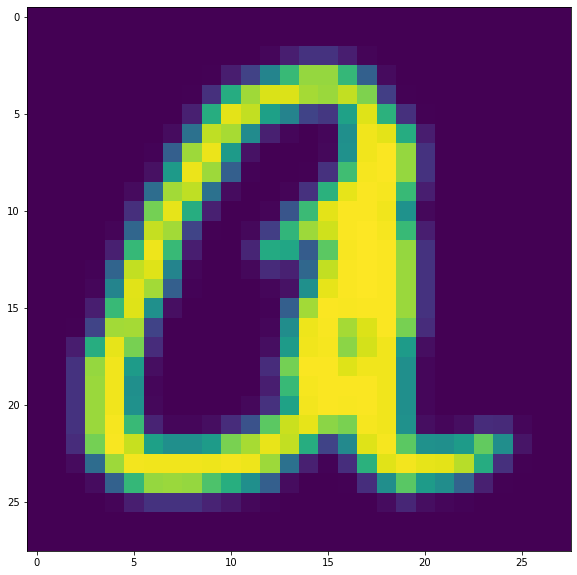

In [6]:
#Labels: 1-9->1-9, 10-35->A-Z, 36-61->a-z
i=0
plt.figure(figsize=(10,10))
print(y[i])
plt.imshow(X_imagenes[i]);

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [7]:
#Logistic Regression and SVC needed way too many iterartion to converge
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,balanced_accuracy_score,precision_score,recall_score,f1_score

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.35)

In [9]:
y_train_upper,y_test_upper=np.where((y_train>9) & (y_train<36),1,0),np.where((y_test>9) & (y_test<36),1,0)

Linear cart
Train as: 1.0, Test as: 0.7509059648194684
Train bas: 1.0, Test bas: 0.6845382469052455
Train ps: [1. 1.], Test ps: [0.82948548 0.53925065]
Train rs: [1. 1.], Test rs: [0.82903442 0.54004207]
Train f1s: [1. 1.], Test f1s: [0.82925989 0.53964607]
Train conf_matrix:
 [[29808     0]
 [    0 10904]]
Test conf_matriz: 
[[45737  9432]
 [ 9402 11039]]
Train


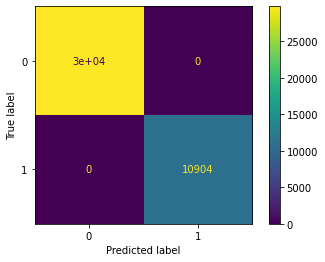

Test


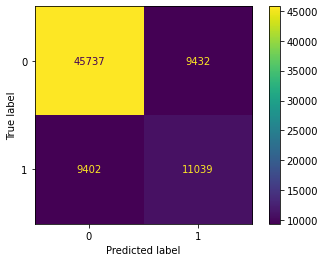

In [10]:
cart = DecisionTreeClassifier()
cart.fit(X_train,y_train_upper)
y_pred_upper_cart=cart.predict(X_train)
y_test_pred_upper_cart=cart.predict(X_test)
print('Linear cart')
print(f'Train as: {accuracy_score(y_train_upper,y_pred_upper_cart)}, Test as: {accuracy_score(y_test_upper,y_test_pred_upper_cart)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper,y_pred_upper_cart)}, Test bas: {balanced_accuracy_score(y_test_upper,y_test_pred_upper_cart)}')
print(f'Train ps: {precision_score(y_train_upper,y_pred_upper_cart,average=None)}, Test ps: {precision_score(y_test_upper,y_test_pred_upper_cart,average=None)}')
print(f'Train rs: {recall_score(y_train_upper,y_pred_upper_cart,average=None)}, Test rs: {recall_score(y_test_upper,y_test_pred_upper_cart,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper,y_pred_upper_cart,average=None)}, Test f1s: {f1_score(y_test_upper,y_test_pred_upper_cart,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper,y_pred_upper_cart)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper,y_test_pred_upper_cart)}')
print('Train')
plot_confusion_matrix(cart,X_train,y_train_upper);
plt.show()
print('Test')
plot_confusion_matrix(cart,X_test,y_test_upper);

Linear lda
Train as: 0.7321674199253292, Test as: 0.7296521624123793
Train bas: 0.5, Test bas: 0.5
Train ps: [0.73216742 0.        ], Test ps: [0.72965216 0.        ]
Train rs: [1. 0.], Test rs: [1. 0.]
Train f1s: [0.8453772 0.       ], Test f1s: [0.84369815 0.        ]


C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train conf_matrix:
 [[29808     0]
 [10904     0]]
Test conf_matriz: 
[[55169     0]
 [20441     0]]
Train


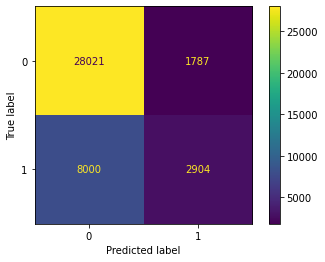

Test


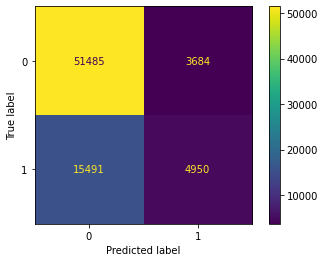

In [11]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train_upper)
y_pred_upper_lda=lda.predict(X_train)
y_test_pred_upper_lda=lda.predict(X_test)
y_pred_upper_lda=np.where((y_pred_upper_lda>9) & (y_pred_upper_lda<36),1,0)
y_test_pred_upper_lda=np.where((y_test_pred_upper_lda>9) & (y_test_pred_upper_lda<36),1,0)
print('Linear lda')
print(f'Train as: {accuracy_score(y_train_upper,y_pred_upper_lda)}, Test as: {accuracy_score(y_test_upper,y_test_pred_upper_lda)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper,y_pred_upper_lda)}, Test bas: {balanced_accuracy_score(y_test_upper,y_test_pred_upper_lda)}')
print(f'Train ps: {precision_score(y_train_upper,y_pred_upper_lda,average=None)}, Test ps: {precision_score(y_test_upper,y_test_pred_upper_lda,average=None)}')
print(f'Train rs: {recall_score(y_train_upper,y_pred_upper_lda,average=None)}, Test rs: {recall_score(y_test_upper,y_test_pred_upper_lda,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper,y_pred_upper_lda,average=None)}, Test f1s: {f1_score(y_test_upper,y_test_pred_upper_lda,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper,y_pred_upper_lda)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper,y_test_pred_upper_lda)}')
print('Train')
plot_confusion_matrix(lda,X_train,y_train_upper);
plt.show()
print('Test')
plot_confusion_matrix(lda,X_test,y_test_upper);

Linear nb
Train as: 0.7321674199253292, Test as: 0.7296521624123793
Train bas: 0.5, Test bas: 0.5
Train ps: [0.73216742 0.        ], Test ps: [0.72965216 0.        ]
Train rs: [1. 0.], Test rs: [1. 0.]
Train f1s: [0.8453772 0.       ], Test f1s: [0.84369815 0.        ]


C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train conf_matrix:
 [[29808     0]
 [10904     0]]
Test conf_matriz: 
[[55169     0]
 [20441     0]]
Train


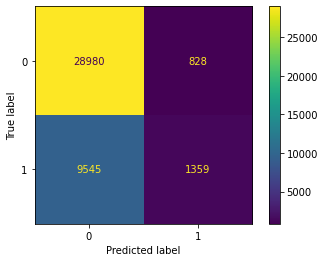

Test


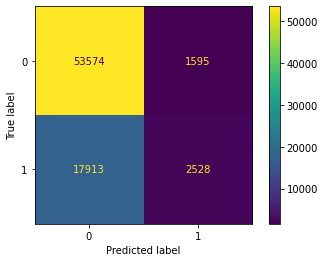

In [12]:
nb = GaussianNB()
nb.fit(X_train,y_train_upper)
y_pred_upper_nb=nb.predict(X_train)
y_test_pred_upper_nb=nb.predict(X_test)
y_pred_upper_nb=np.where((y_pred_upper_nb>9) & (y_pred_upper_nb<36),1,0)
y_test_pred_upper_nb=np.where((y_test_pred_upper_nb>9) & (y_test_pred_upper_nb<36),1,0)
print('Linear nb')
print(f'Train as: {accuracy_score(y_train_upper,y_pred_upper_nb)}, Test as: {accuracy_score(y_test_upper,y_test_pred_upper_nb)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper,y_pred_upper_nb)}, Test bas: {balanced_accuracy_score(y_test_upper,y_test_pred_upper_nb)}')
print(f'Train ps: {precision_score(y_train_upper,y_pred_upper_nb,average=None)}, Test ps: {precision_score(y_test_upper,y_test_pred_upper_nb,average=None)}')
print(f'Train rs: {recall_score(y_train_upper,y_pred_upper_nb,average=None)}, Test rs: {recall_score(y_test_upper,y_test_pred_upper_nb,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper,y_pred_upper_nb,average=None)}, Test f1s: {f1_score(y_test_upper,y_test_pred_upper_nb,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper,y_pred_upper_nb)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper,y_test_pred_upper_nb)}')
print('Train')
plot_confusion_matrix(nb,X_train,y_train_upper);
plt.show()
print('Test')
plot_confusion_matrix(nb,X_test,y_test_upper);

Linear rfc
Train as: 1.0, Test as: 0.8366882687475201
Train bas: 1.0, Test bas: 0.7350681551259641
Train ps: [1. 1.], Test ps: [0.84149162 0.81336637]
Train rs: [1. 1.], Test rs: [0.95631605 0.51382026]
Train f1s: [1. 1.], Test f1s: [0.89523696 0.62978953]
Train conf_matrix:
 [[29808     0]
 [    0 10904]]
Test conf_matriz: 
[[52759  2410]
 [ 9938 10503]]
Train


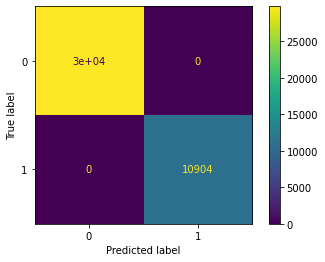

Test


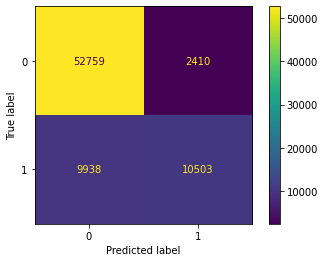

In [13]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train_upper)
y_pred_upper_rfc=rfc.predict(X_train)
y_test_pred_upper_rfc=rfc.predict(X_test)
print('Linear rfc')
print(f'Train as: {accuracy_score(y_train_upper,y_pred_upper_rfc)}, Test as: {accuracy_score(y_test_upper,y_test_pred_upper_rfc)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper,y_pred_upper_rfc)}, Test bas: {balanced_accuracy_score(y_test_upper,y_test_pred_upper_rfc)}')
print(f'Train ps: {precision_score(y_train_upper,y_pred_upper_rfc,average=None)}, Test ps: {precision_score(y_test_upper,y_test_pred_upper_rfc,average=None)}')
print(f'Train rs: {recall_score(y_train_upper,y_pred_upper_rfc,average=None)}, Test rs: {recall_score(y_test_upper,y_test_pred_upper_rfc,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper,y_pred_upper_rfc,average=None)}, Test f1s: {f1_score(y_test_upper,y_test_pred_upper_rfc,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper,y_pred_upper_rfc)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper,y_test_pred_upper_rfc)}')
print('Train')
plot_confusion_matrix(rfc,X_train,y_train_upper);
plt.show()
print('Test')
plot_confusion_matrix(rfc,X_test,y_test_upper);

* Try to do the same thing with lowercases.

In [14]:
y_train_lower,y_test_lower=np.where(y_train>=36,1,0),np.where(y_test>=36,1,0)

Linear cart
Train as: 1.0, Test as: 0.7773971696865494
Train bas: 1.0, Test bas: 0.6954178888034196
Train ps: [1. 1.], Test ps: [0.85835165 0.52372622]
Train rs: [1. 1.], Test rs: [0.84956226 0.54127352]
Train f1s: [1. 1.], Test f1s: [0.85393434 0.53235531]
Train conf_matrix:
 [[31352     0]
 [    0  9360]]
Test conf_matriz: 
[[49199  8712]
 [ 8119  9580]]
Train


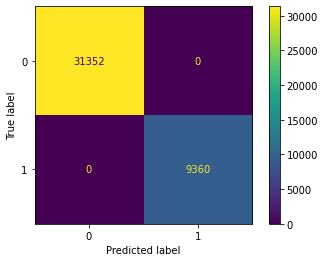

Test


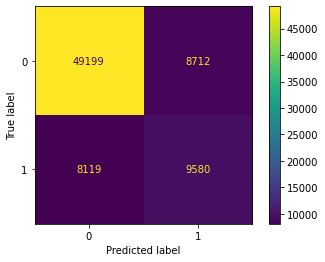

In [15]:
cart = DecisionTreeClassifier()
cart.fit(X_train,y_train_lower)
y_pred_lower_cart=cart.predict(X_train)
y_test_pred_lower_cart=cart.predict(X_test)
print('Linear cart')
print(f'Train as: {accuracy_score(y_train_lower,y_pred_lower_cart)}, Test as: {accuracy_score(y_test_lower,y_test_pred_lower_cart)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower,y_pred_lower_cart)}, Test bas: {balanced_accuracy_score(y_test_lower,y_test_pred_lower_cart)}')
print(f'Train ps: {precision_score(y_train_lower,y_pred_lower_cart,average=None)}, Test ps: {precision_score(y_test_lower,y_test_pred_lower_cart,average=None)}')
print(f'Train rs: {recall_score(y_train_lower,y_pred_lower_cart,average=None)}, Test rs: {recall_score(y_test_lower,y_test_pred_lower_cart,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower,y_pred_lower_cart,average=None)}, Test f1s: {f1_score(y_test_lower,y_test_pred_lower_cart,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower,y_pred_lower_cart)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower,y_test_pred_lower_cart)}')
print('Train')
plot_confusion_matrix(cart,X_train,y_train_lower);
plt.show()
print('Test')
plot_confusion_matrix(cart,X_test,y_test_lower);

Linear lda
Train as: 0.8156808803301238, Test as: 0.8056077238460521
Train bas: 0.6574874242949644, Test bas: 0.6474330886832276
Train ps: [0.83361312 0.68672032], Test ps: [0.82627867 0.65981468]
Train rs: [0.9503381  0.36463675], Test rs: [0.9448464  0.35001978]
Train f1s: [0.88815691 0.47634334], Test f1s: [0.88159379 0.45739811]
Train conf_matrix:
 [[29795  1557]
 [ 5947  3413]]
Test conf_matriz: 
[[54717  3194]
 [11504  6195]]
Train


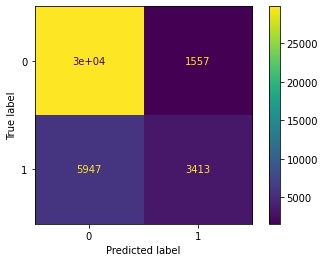

Test


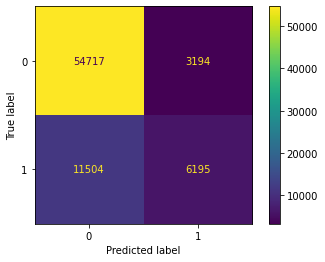

In [16]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train_lower)
y_pred_lower_lda=lda.predict(X_train)
y_test_pred_lower_lda=lda.predict(X_test)
print('Linear lda')
print(f'Train as: {accuracy_score(y_train_lower,y_pred_lower_lda)}, Test as: {accuracy_score(y_test_lower,y_test_pred_lower_lda)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower,y_pred_lower_lda)}, Test bas: {balanced_accuracy_score(y_test_lower,y_test_pred_lower_lda)}')
print(f'Train ps: {precision_score(y_train_lower,y_pred_lower_lda,average=None)}, Test ps: {precision_score(y_test_lower,y_test_pred_lower_lda,average=None)}')
print(f'Train rs: {recall_score(y_train_lower,y_pred_lower_lda,average=None)}, Test rs: {recall_score(y_test_lower,y_test_pred_lower_lda,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower,y_pred_lower_lda,average=None)}, Test f1s: {f1_score(y_test_lower,y_test_pred_lower_lda,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower,y_pred_lower_lda)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower,y_test_pred_lower_lda)}')
print('Train')
plot_confusion_matrix(lda,X_train,y_train_lower);
plt.show()
print('Test')
plot_confusion_matrix(lda,X_test,y_test_lower);

Linear nb
Train as: 0.2611023776773433, Test as: 0.26394656791429705
Train bas: 0.514895558674265, Test bas: 0.513237850382682
Train ps: [0.90809769 0.23539177], Test ps: [0.88984807 0.23901862]
Train rs: [0.0450689  0.98472222], Test rs: [0.04449932 0.98197638]
Train f1s: [0.08587577 0.37995713], Test f1s: [0.08475998 0.38445799]
Train conf_matrix:
 [[ 1413 29939]
 [  143  9217]]
Test conf_matriz: 
[[ 2577 55334]
 [  319 17380]]
Train


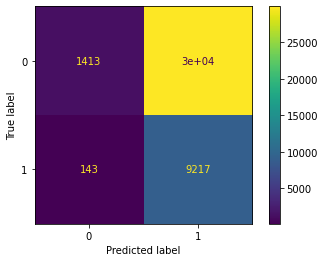

Test


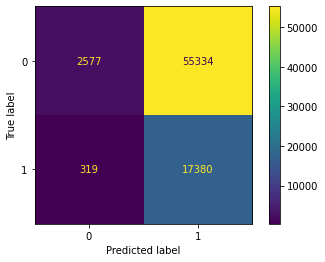

In [17]:
nb = GaussianNB()
nb.fit(X_train,y_train_lower)
y_pred_lower_nb=nb.predict(X_train)
y_test_pred_lower_nb=nb.predict(X_test)
print('Linear nb')
print(f'Train as: {accuracy_score(y_train_lower,y_pred_lower_nb)}, Test as: {accuracy_score(y_test_lower,y_test_pred_lower_nb)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower,y_pred_lower_nb)}, Test bas: {balanced_accuracy_score(y_test_lower,y_test_pred_lower_nb)}')
print(f'Train ps: {precision_score(y_train_lower,y_pred_lower_nb,average=None)}, Test ps: {precision_score(y_test_lower,y_test_pred_lower_nb,average=None)}')
print(f'Train rs: {recall_score(y_train_lower,y_pred_lower_nb,average=None)}, Test rs: {recall_score(y_test_lower,y_test_pred_lower_nb,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower,y_pred_lower_nb,average=None)}, Test f1s: {f1_score(y_test_lower,y_test_pred_lower_nb,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower,y_pred_lower_nb)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower,y_test_pred_lower_nb)}')
print('Train')
plot_confusion_matrix(nb,X_train,y_train_lower);
plt.show()
print('Test')
plot_confusion_matrix(nb,X_test,y_test_lower);

Linear rfc
Train as: 1.0, Test as: 0.8748049199841291
Train bas: 1.0, Test bas: 0.7538870042354124
Train ps: [1. 1.], Test ps: [0.87148225 0.8956271 ]
Train rs: [1. 1.], Test rs: [0.98124709 0.52652692]
Train f1s: [1. 1.], Test f1s: [0.92311316 0.66317962]
Train conf_matrix:
 [[31352     0]
 [    0  9360]]
Test conf_matriz: 
[[56825  1086]
 [ 8380  9319]]
Train


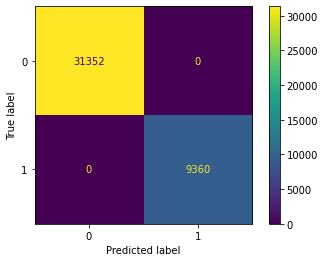

Test


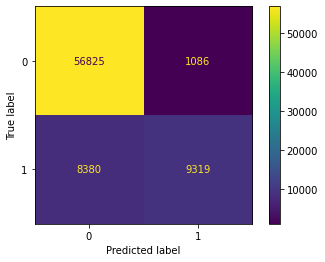

In [18]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train_lower)
y_pred_lower_rfc=rfc.predict(X_train)
y_test_pred_lower_rfc=rfc.predict(X_test)
print('Linear rfc')
print(f'Train as: {accuracy_score(y_train_lower,y_pred_lower_rfc)}, Test as: {accuracy_score(y_test_lower,y_test_pred_lower_rfc)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower,y_pred_lower_rfc)}, Test bas: {balanced_accuracy_score(y_test_lower,y_test_pred_lower_rfc)}')
print(f'Train ps: {precision_score(y_train_lower,y_pred_lower_rfc,average=None)}, Test ps: {precision_score(y_test_lower,y_test_pred_lower_rfc,average=None)}')
print(f'Train rs: {recall_score(y_train_lower,y_pred_lower_rfc,average=None)}, Test rs: {recall_score(y_test_lower,y_test_pred_lower_rfc,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower,y_pred_lower_rfc,average=None)}, Test f1s: {f1_score(y_test_lower,y_test_pred_lower_rfc,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower,y_pred_lower_rfc)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower,y_test_pred_lower_rfc)}')
print('Train')
plot_confusion_matrix(rfc,X_train,y_train_lower);
plt.show()
print('Test')
plot_confusion_matrix(rfc,X_test,y_test_lower);

* Try to do the same thing with numbers.

In [19]:
y_train_number,y_test_number=np.where(y_train<=9,1,0),np.where(y_test<=9,1,0)

Linear cart
Train as: 1.0, Test as: 0.7606401269673324
Train bas: 1.0, Test bas: 0.7607010306724666
Train ps: [1. 1.], Test ps: [0.76751201 0.75389253]
Train rs: [1. 1.], Test rs: [0.753828   0.76757406]
Train f1s: [1. 1.], Test f1s: [0.76060847 0.76067178]
Train conf_matrix:
 [[20264     0]
 [    0 20448]]
Test conf_matriz: 
[[28751  9389]
 [ 8709 28761]]
Train


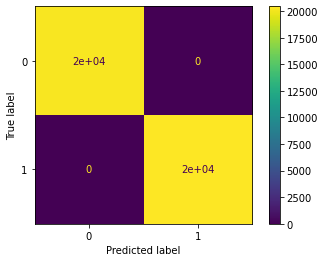

Test


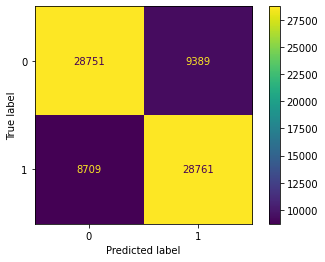

In [20]:
cart = DecisionTreeClassifier()
cart.fit(X_train,y_train_number)
y_pred_number_cart=cart.predict(X_train)
y_test_pred_number_cart=cart.predict(X_test)
print('Linear cart')
print(f'Train as: {accuracy_score(y_train_number,y_pred_number_cart)}, Test as: {accuracy_score(y_test_number,y_test_pred_number_cart)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number,y_pred_number_cart)}, Test bas: {balanced_accuracy_score(y_test_number,y_test_pred_number_cart)}')
print(f'Train ps: {precision_score(y_train_number,y_pred_number_cart,average=None)}, Test ps: {precision_score(y_test_number,y_test_pred_number_cart,average=None)}')
print(f'Train rs: {recall_score(y_train_number,y_pred_number_cart,average=None)}, Test rs: {recall_score(y_test_number,y_test_pred_number_cart,average=None)}')
print(f'Train f1s: {f1_score(y_train_number,y_pred_number_cart,average=None)}, Test f1s: {f1_score(y_test_number,y_test_pred_number_cart,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number,y_pred_number_cart)}\nTest conf_matriz: \n{confusion_matrix(y_test_number,y_test_pred_number_cart)}')
print('Train')
plot_confusion_matrix(cart,X_train,y_train_number);
plt.show()
print('Test')
plot_confusion_matrix(cart,X_test,y_test_number);

Linear lda
Train as: 0.7405678915307526, Test as: 0.7333818278005555
Train bas: 0.7404262657027394, Test bas: 0.733679105493799
Train ps: [0.75483295 0.72804023], Test ps: [0.7537897  0.71539132]
Train rs: [0.70909001 0.77176252], Test rs: [0.7001311  0.76722712]
Train f1s: [0.73124682 0.74926408], Test f1s: [0.72597023 0.74040306]
Train conf_matrix:
 [[14369  5895]
 [ 4667 15781]]
Test conf_matriz: 
[[26703 11437]
 [ 8722 28748]]
Train


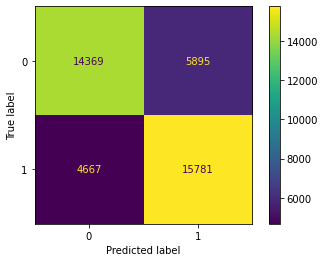

Test


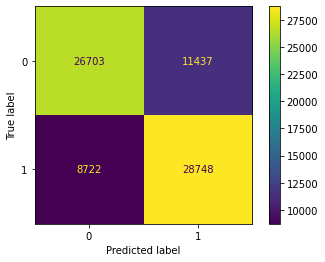

In [21]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train_number)
y_pred_number_lda=lda.predict(X_train)
y_test_pred_number_lda=lda.predict(X_test)
print('Linear lda')
print(f'Train as: {accuracy_score(y_train_number,y_pred_number_lda)}, Test as: {accuracy_score(y_test_number,y_test_pred_number_lda)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number,y_pred_number_lda)}, Test bas: {balanced_accuracy_score(y_test_number,y_test_pred_number_lda)}')
print(f'Train ps: {precision_score(y_train_number,y_pred_number_lda,average=None)}, Test ps: {precision_score(y_test_number,y_test_pred_number_lda,average=None)}')
print(f'Train rs: {recall_score(y_train_number,y_pred_number_lda,average=None)}, Test rs: {recall_score(y_test_number,y_test_pred_number_lda,average=None)}')
print(f'Train f1s: {f1_score(y_train_number,y_pred_number_lda,average=None)}, Test f1s: {f1_score(y_test_number,y_test_pred_number_lda,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number,y_pred_number_lda)}\nTest conf_matriz: \n{confusion_matrix(y_test_number,y_test_pred_number_lda)}')
print('Train')
plot_confusion_matrix(lda,X_train,y_train_number);
plt.show()
print('Test')
plot_confusion_matrix(lda,X_test,y_test_number);

Linear nb
Train as: 0.546742975044213, Test as: 0.5393334215050919
Train bas: 0.5448177078989267, Test bas: 0.5431189874115688
Train ps: [0.80133111 0.52645397], Test ps: [0.79902404 0.51882929]
Train rs: [0.11883143 0.97080399], Test rs: [0.11591505 0.97032293]
Train f1s: [0.20697065 0.6826928 ], Test f1s: [0.20245919 0.6761323 ]
Train conf_matrix:
 [[ 2408 17856]
 [  597 19851]]
Test conf_matriz: 
[[ 4421 33719]
 [ 1112 36358]]
Train


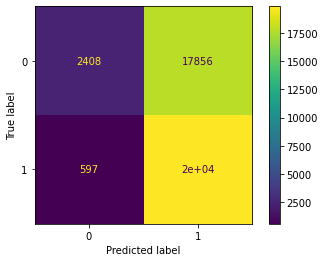

Test


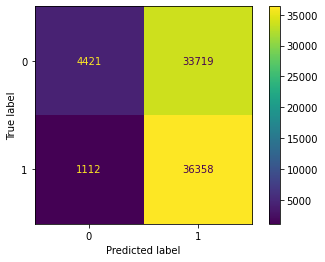

In [22]:
nb = GaussianNB()
nb.fit(X_train,y_train_number)
y_pred_number_nb=nb.predict(X_train)
y_test_pred_number_nb=nb.predict(X_test)
print('Linear nb')
print(f'Train as: {accuracy_score(y_train_number,y_pred_number_nb)}, Test as: {accuracy_score(y_test_number,y_test_pred_number_nb)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number,y_pred_number_nb)}, Test bas: {balanced_accuracy_score(y_test_number,y_test_pred_number_nb)}')
print(f'Train ps: {precision_score(y_train_number,y_pred_number_nb,average=None)}, Test ps: {precision_score(y_test_number,y_test_pred_number_nb,average=None)}')
print(f'Train rs: {recall_score(y_train_number,y_pred_number_nb,average=None)}, Test rs: {recall_score(y_test_number,y_test_pred_number_nb,average=None)}')
print(f'Train f1s: {f1_score(y_train_number,y_pred_number_nb,average=None)}, Test f1s: {f1_score(y_test_number,y_test_pred_number_nb,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number,y_pred_number_nb)}\nTest conf_matriz: \n{confusion_matrix(y_test_number,y_test_pred_number_nb)}')
print('Train')
plot_confusion_matrix(nb,X_train,y_train_number);
plt.show()
print('Test')
plot_confusion_matrix(nb,X_test,y_test_number);

Linear rfc
Train as: 1.0, Test as: 0.8700039677291364
Train bas: 1.0, Test bas: 0.8701108483360714
Train ps: [1. 1.], Test ps: [0.88112867 0.8592633 ]
Train rs: [1. 1.], Test rs: [0.85804929 0.8821724 ]
Train f1s: [1. 1.], Test f1s: [0.86943585 0.87056717]
Train conf_matrix:
 [[20264     0]
 [    0 20448]]
Test conf_matriz: 
[[32726  5414]
 [ 4415 33055]]
Train


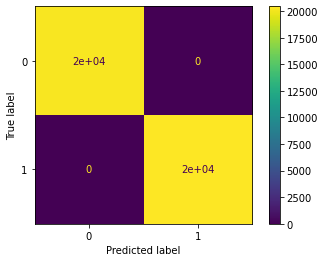

Test


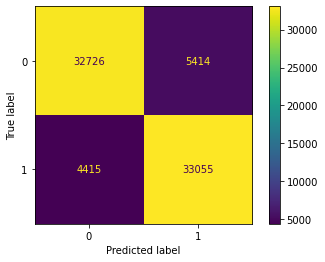

In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train_number)
y_pred_number_rfc=rfc.predict(X_train)
y_test_pred_number_rfc=rfc.predict(X_test)
print('Linear rfc')
print(f'Train as: {accuracy_score(y_train_number,y_pred_number_rfc)}, Test as: {accuracy_score(y_test_number,y_test_pred_number_rfc)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number,y_pred_number_rfc)}, Test bas: {balanced_accuracy_score(y_test_number,y_test_pred_number_rfc)}')
print(f'Train ps: {precision_score(y_train_number,y_pred_number_rfc,average=None)}, Test ps: {precision_score(y_test_number,y_test_pred_number_rfc,average=None)}')
print(f'Train rs: {recall_score(y_train_number,y_pred_number_rfc,average=None)}, Test rs: {recall_score(y_test_number,y_test_pred_number_rfc,average=None)}')
print(f'Train f1s: {f1_score(y_train_number,y_pred_number_rfc,average=None)}, Test f1s: {f1_score(y_test_number,y_test_pred_number_rfc,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number,y_pred_number_rfc)}\nTest conf_matriz: \n{confusion_matrix(y_test_number,y_test_pred_number_rfc)}')
print('Train')
plot_confusion_matrix(rfc,X_train,y_train_number);
plt.show()
print('Test')
plot_confusion_matrix(rfc,X_test,y_test_number);

* Try to do the same thing with all.

In [24]:
y_train_all,y_test_all=np.where(y_train<=9,0,np.where(y_train<36,1,2)),np.where(y_test<=9,0,np.where(y_test<36,1,2))

Linear cart
Train as: 1.0, Test as: 0.6508001587091654
Train bas: 1.0, Test bas: 0.6165040058082368
Train ps: [1. 1. 1.], Test ps: [0.7626973  0.54282624 0.54134295]
Train rs: [1. 1. 1.], Test rs: [0.75825994 0.54009099 0.55116108]
Train f1s: [1. 1. 1.], Test f1s: [0.76047215 0.54145516 0.5462079 ]
Train conf_matrix:
 [[20448     0     0]
 [    0 10904     0]
 [    0     0  9360]]
Test conf_matriz: 
[[28412  5026  4032]
 [ 5168 11040  4233]
 [ 3672  4272  9755]]
Train


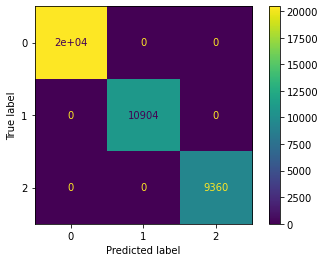

Test


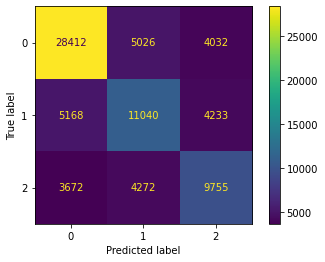

In [25]:
cart = DecisionTreeClassifier()
cart.fit(X_train,y_train_all)
y_pred_all_cart=cart.predict(X_train)
y_test_pred_all_cart=cart.predict(X_test)
print('Linear cart')
print(f'Train as: {accuracy_score(y_train_all,y_pred_all_cart)}, Test as: {accuracy_score(y_test_all,y_test_pred_all_cart)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all,y_pred_all_cart)}, Test bas: {balanced_accuracy_score(y_test_all,y_test_pred_all_cart)}')
print(f'Train ps: {precision_score(y_train_all,y_pred_all_cart,average=None)}, Test ps: {precision_score(y_test_all,y_test_pred_all_cart,average=None)}')
print(f'Train rs: {recall_score(y_train_all,y_pred_all_cart,average=None)}, Test rs: {recall_score(y_test_all,y_test_pred_all_cart,average=None)}')
print(f'Train f1s: {f1_score(y_train_all,y_pred_all_cart,average=None)}, Test f1s: {f1_score(y_test_all,y_test_pred_all_cart,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all,y_pred_all_cart)}\nTest conf_matriz: \n{confusion_matrix(y_test_all,y_test_pred_all_cart)}')
print('Train')
plot_confusion_matrix(cart,X_train,y_train_all);
plt.show()
print('Test')
plot_confusion_matrix(cart,X_test,y_test_all);

Linear lda
Train as: 0.6504224798585184, Test as: 0.6347573072344928
Train bas: 0.5821098979451517, Test bas: 0.5668327666958749
Train ps: [0.68722571 0.57356576 0.60399734], Test ps: [0.67338939 0.55234012 0.58676927]
Train rs: [0.85768779 0.40434703 0.48429487], Test rs: [0.85276221 0.37816154 0.46957455]
Train f1s: [0.76305256 0.47431553 0.537563  ], Test f1s: [0.75253471 0.44894877 0.5216709 ]
Train conf_matrix:
 [[17538  1873  1037]
 [ 4560  4409  1935]
 [ 3422  1405  4533]]
Test conf_matriz: 
[[31953  3450  2067]
 [ 8925  7730  3786]
 [ 6573  2815  8311]]
Train


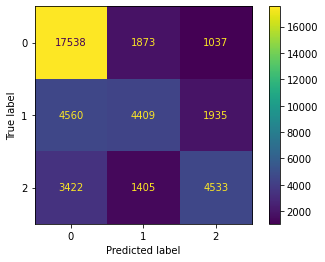

Test


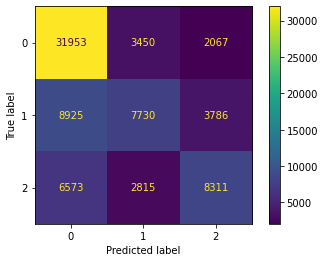

In [26]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train_all)
y_pred_all_lda=lda.predict(X_train)
y_test_pred_all_lda=lda.predict(X_test)
print('Linear lda')
print(f'Train as: {accuracy_score(y_train_all,y_pred_all_lda)}, Test as: {accuracy_score(y_test_all,y_test_pred_all_lda)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all,y_pred_all_lda)}, Test bas: {balanced_accuracy_score(y_test_all,y_test_pred_all_lda)}')
print(f'Train ps: {precision_score(y_train_all,y_pred_all_lda,average=None)}, Test ps: {precision_score(y_test_all,y_test_pred_all_lda,average=None)}')
print(f'Train rs: {recall_score(y_train_all,y_pred_all_lda,average=None)}, Test rs: {recall_score(y_test_all,y_test_pred_all_lda,average=None)}')
print(f'Train f1s: {f1_score(y_train_all,y_pred_all_lda,average=None)}, Test f1s: {f1_score(y_test_all,y_test_pred_all_lda,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all,y_pred_all_lda)}\nTest conf_matriz: \n{confusion_matrix(y_test_all,y_test_pred_all_lda)}')
print('Train')
plot_confusion_matrix(lda,X_train,y_train_all);
plt.show()
print('Test')
plot_confusion_matrix(lda,X_test,y_test_all);

Linear nb
Train as: 0.5490273138141089, Test as: 0.5444253405634175
Train bas: 0.43032501247596117, Test bas: 0.43012536677165647
Train ps: [0.56816245 0.66497462 0.42000636], Test ps: [0.56190195 0.65436242 0.42544647]
Train rs: [0.9127054  0.09611152 0.28215812], Test rs: [0.91366426 0.09539651 0.28131533]
Train f1s: [0.70035275 0.16794872 0.33755112], Test f1s: [0.69585455 0.16651723 0.33868444]
Train conf_matrix:
 [[18663   315  1470]
 [ 7679  1048  2177]
 [ 6506   213  2641]]
Test conf_matriz: 
[[34235   583  2652]
 [14419  1950  4072]
 [12273   447  4979]]
Train


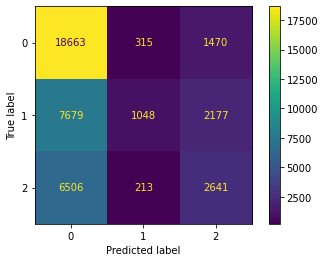

Test


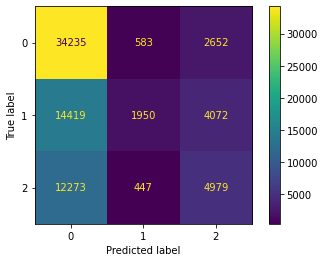

In [27]:
nb = GaussianNB()
nb.fit(X_train,y_train_all)
y_pred_all_nb=nb.predict(X_train)
y_test_pred_all_nb=nb.predict(X_test)
print('Linear nb')
print(f'Train as: {accuracy_score(y_train_all,y_pred_all_nb)}, Test as: {accuracy_score(y_test_all,y_test_pred_all_nb)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all,y_pred_all_nb)}, Test bas: {balanced_accuracy_score(y_test_all,y_test_pred_all_nb)}')
print(f'Train ps: {precision_score(y_train_all,y_pred_all_nb,average=None)}, Test ps: {precision_score(y_test_all,y_test_pred_all_nb,average=None)}')
print(f'Train rs: {recall_score(y_train_all,y_pred_all_nb,average=None)}, Test rs: {recall_score(y_test_all,y_test_pred_all_nb,average=None)}')
print(f'Train f1s: {f1_score(y_train_all,y_pred_all_nb,average=None)}, Test f1s: {f1_score(y_test_all,y_test_pred_all_nb,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all,y_pred_all_nb)}\nTest conf_matriz: \n{confusion_matrix(y_test_all,y_test_pred_all_nb)}')
print('Train')
plot_confusion_matrix(nb,X_train,y_train_all);
plt.show()
print('Test')
plot_confusion_matrix(nb,X_test,y_test_all);

Linear rfc
Train as: 1.0, Test as: 0.795225499272583
Train bas: 1.0, Test bas: 0.7480065215662082
Train ps: [1. 1. 1.], Test ps: [0.81100617 0.74020074 0.82200792]
Train rs: [1. 1. 1.], Test rs: [0.93725647 0.68548505 0.62127804]
Train f1s: [1. 1. 1.], Test f1s: [0.86957275 0.71179294 0.70768439]
Train conf_matrix:
 [[20448     0     0]
 [    0 10904     0]
 [    0     0  9360]]
Test conf_matriz: 
[[35119  1593   758]
 [ 4806 14012  1623]
 [ 3378  3325 10996]]
Train


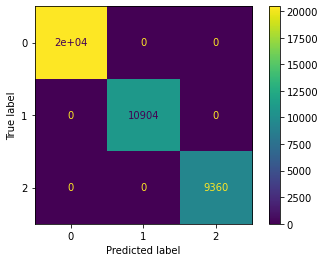

Test


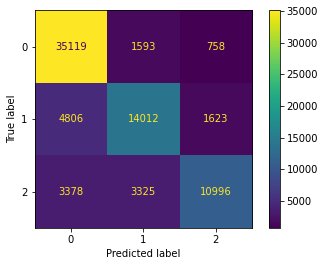

In [28]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train_all)
y_pred_all_rfc=rfc.predict(X_train)
y_test_pred_all_rfc=rfc.predict(X_test)
print('Linear rfc')
print(f'Train as: {accuracy_score(y_train_all,y_pred_all_rfc)}, Test as: {accuracy_score(y_test_all,y_test_pred_all_rfc)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all,y_pred_all_rfc)}, Test bas: {balanced_accuracy_score(y_test_all,y_test_pred_all_rfc)}')
print(f'Train ps: {precision_score(y_train_all,y_pred_all_rfc,average=None)}, Test ps: {precision_score(y_test_all,y_test_pred_all_rfc,average=None)}')
print(f'Train rs: {recall_score(y_train_all,y_pred_all_rfc,average=None)}, Test rs: {recall_score(y_test_all,y_test_pred_all_rfc,average=None)}')
print(f'Train f1s: {f1_score(y_train_all,y_pred_all_rfc,average=None)}, Test f1s: {f1_score(y_test_all,y_test_pred_all_rfc,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all,y_pred_all_rfc)}\nTest conf_matriz: \n{confusion_matrix(y_test_all,y_test_pred_all_rfc)}')
print('Train')
plot_confusion_matrix(rfc,X_train,y_train_all);
plt.show()
print('Test')
plot_confusion_matrix(rfc,X_test,y_test_all);

### Is it better if why classify by letter first and then group?

In [29]:
#pca was useless
from sklearn.decomposition import TruncatedSVD,PCA
svd=TruncatedSVD(n_components=100)
pca=PCA(n_components=100)
X_pca=pca.fit_transform(X,y)
X_svd=svd.fit_transform(X,y)

In [30]:
#from sklearn.preprocessing import StandardScaler,MinMaxScaler
#stand=StandardScaler()
#minmax=MinMaxScaler()
#X_svd=stand.fit_transform(X_svd)
#X_pca=minmax.fit_transform(X_pca)

In [31]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,train_size=.35)
X_train_svd,X_test_svd,y_train_svd,y_test_svd=train_test_split(X_svd,y,train_size=.35)
y_train_upper_pca,y_test_upper_pca=np.where((y_train_pca>9) & (y_train_pca<36),1,0),np.where((y_test_pca>9) & (y_test_pca<36),1,0)
y_train_upper_svd,y_test_upper_svd=np.where((y_train_svd>9) & (y_train_svd<36),1,0),np.where((y_test_svd>9) & (y_test_svd<36),1,0)
y_train_lower_pca,y_test_lower_pca=np.where(y_train_pca>=36,1,0),np.where(y_test_pca>=36,1,0)
y_train_lower_svd,y_test_lower_svd=np.where(y_train_svd>=36,1,0),np.where(y_test_svd>=36,1,0)
y_train_number_pca,y_test_number_pca=np.where(y_train_pca<=9,1,0),np.where(y_test_pca<=9,1,0)
y_train_number_svd,y_test_number_svd=np.where(y_train_svd<=9,1,0),np.where(y_test_svd<=9,1,0)
y_train_all_pca,y_test_all_pca=np.where(y_train_pca<=9,0,np.where(y_train_pca<36,1,2)),np.where(y_test_pca<=9,0,np.where(y_test_pca<36,1,2))
y_train_all_svd,y_test_all_svd=np.where(y_train_svd<=9,0,np.where(y_train_svd<36,1,2)),np.where(y_test_svd<=9,0,np.where(y_test_svd<36,1,2))

In [32]:
logreg1=LogisticRegression(max_iter=1000)
logreg2=LogisticRegression(max_iter=1000)
logreg1.fit(X_train_pca,y_train_pca)
logreg2.fit(X_train_svd,y_train_svd)
y_pred_logreg1=logreg1.predict(X_train_pca)
y_test_pred_logreg1=logreg1.predict(X_test_pca)
y_pred_logreg2=logreg2.predict(X_train_svd)
y_test_pred_logreg2=logreg2.predict(X_test_svd)
y_pred_upper_logreg1,y_test_pred_upper_logreg1=np.where((y_pred_logreg1>9) & (y_pred_logreg1<36),1,0),np.where((y_test_pred_logreg1>9) & (y_test_pred_logreg1<36),1,0)
y_pred_upper_logreg2,y_test_pred_upper_logreg2=np.where((y_pred_logreg2>9) & (y_pred_logreg2<36),1,0),np.where((y_test_pred_logreg2>9) & (y_test_pred_logreg2<36),1,0)
y_pred_lower_logreg1,y_test_pred_lower_logreg1=np.where(y_pred_logreg1>=36,1,0),np.where(y_test_pred_logreg1>=36,1,0)
y_pred_lower_logreg2,y_test_pred_lower_logreg2=np.where(y_pred_logreg2>=36,1,0),np.where(y_test_pred_logreg2>=36,1,0)
y_pred_number_logreg1,y_test_pred_number_logreg1=np.where(y_pred_logreg1<=9,1,0),np.where(y_test_pred_logreg1<=9,1,0)
y_pred_number_logreg2,y_test_pred_number_logreg2=np.where(y_pred_logreg2<=9,1,0),np.where(y_test_pred_logreg2<=9,1,0)
y_pred_all_logreg1,y_test_pred_all_logreg1=np.where(y_pred_logreg1<=9,0,np.where(y_pred_logreg1<36,1,2)),np.where(y_test_pred_logreg1<=9,0,np.where(y_test_pred_logreg1<36,1,2))
y_pred_all_logreg2,y_test_pred_all_logreg2=np.where(y_pred_logreg2<=9,0,np.where(y_pred_logreg2<36,1,2)),np.where(y_test_pred_logreg2<=9,0,np.where(y_test_pred_logreg2<36,1,2))
print('Linear logreg')
print('upper')
print('pca')
print(f'Train as: {accuracy_score(y_train_upper_svd,y_pred_upper_logreg1)}, Test as: {accuracy_score(y_test_upper_svd,y_test_pred_upper_logreg1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper_svd,y_pred_upper_logreg1)}, Test bas: {balanced_accuracy_score(y_test_upper_svd,y_test_pred_upper_logreg1)}')
print(f'Train ps: {precision_score(y_train_upper_svd,y_pred_upper_logreg1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_upper_svd,y_test_pred_upper_logreg1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_upper_svd,y_pred_upper_logreg1,average=None)}, Test rs: {recall_score(y_test_upper_svd,y_test_pred_upper_logreg1,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper_svd,y_pred_upper_logreg1,average=None)}, Test f1s: {f1_score(y_test_upper_svd,y_test_pred_upper_logreg1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper_svd,y_pred_upper_logreg1)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper_svd,y_test_pred_upper_logreg1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_upper_svd,y_pred_upper_logreg2)}, Test as: {accuracy_score(y_test_upper_svd,y_test_pred_upper_logreg2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper_svd,y_pred_upper_logreg2)}, Test bas: {balanced_accuracy_score(y_test_upper_svd,y_test_pred_upper_logreg2)}')
print(f'Train ps: {precision_score(y_train_upper_svd,y_pred_upper_logreg2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_upper_svd,y_test_pred_upper_logreg2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_upper_svd,y_pred_upper_logreg2,average=None)}, Test rs: {recall_score(y_test_upper_svd,y_test_pred_upper_logreg2,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper_svd,y_pred_upper_logreg2,average=None)}, Test f1s: {f1_score(y_test_upper_svd,y_test_pred_upper_logreg2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper_svd,y_pred_upper_logreg2)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper_svd,y_test_pred_upper_logreg2)}')
print('lower')
print('pca')
print(f'Train as: {accuracy_score(y_train_lower_svd,y_pred_lower_logreg1)}, Test as: {accuracy_score(y_test_lower_svd,y_test_pred_lower_logreg1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower_svd,y_pred_lower_logreg1)}, Test bas: {balanced_accuracy_score(y_test_lower_svd,y_test_pred_lower_logreg1)}')
print(f'Train ps: {precision_score(y_train_lower_svd,y_pred_lower_logreg1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_lower_svd,y_test_pred_lower_logreg1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_lower_svd,y_pred_lower_logreg1,average=None)}, Test rs: {recall_score(y_test_lower_svd,y_test_pred_lower_logreg1,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower_svd,y_pred_lower_logreg1,average=None)}, Test f1s: {f1_score(y_test_lower_svd,y_test_pred_lower_logreg1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower_svd,y_pred_lower_logreg1)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower_svd,y_test_pred_lower_logreg1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_lower_svd,y_pred_lower_logreg2)}, Test as: {accuracy_score(y_test_lower_svd,y_test_pred_lower_logreg2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower_svd,y_pred_lower_logreg2)}, Test bas: {balanced_accuracy_score(y_test_lower_svd,y_test_pred_lower_logreg2)}')
print(f'Train ps: {precision_score(y_train_lower_svd,y_pred_lower_logreg2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_lower_svd,y_test_pred_lower_logreg2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_lower_svd,y_pred_lower_logreg2,average=None)}, Test rs: {recall_score(y_test_lower_svd,y_test_pred_lower_logreg2,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower_svd,y_pred_lower_logreg2,average=None)}, Test f1s: {f1_score(y_test_lower_svd,y_test_pred_lower_logreg2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower_svd,y_pred_lower_logreg2)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower_svd,y_test_pred_lower_logreg2)}')
print('numbers')
print('pca')
print(f'Train as: {accuracy_score(y_train_number_svd,y_pred_number_logreg1)}, Test as: {accuracy_score(y_test_number_svd,y_test_pred_number_logreg1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number_svd,y_pred_number_logreg1)}, Test bas: {balanced_accuracy_score(y_test_number_svd,y_test_pred_number_logreg1)}')
print(f'Train ps: {precision_score(y_train_number_svd,y_pred_number_logreg1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_number_svd,y_test_pred_number_logreg1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_number_svd,y_pred_number_logreg1,average=None)}, Test rs: {recall_score(y_test_number_svd,y_test_pred_number_logreg1,average=None)}')
print(f'Train f1s: {f1_score(y_train_number_svd,y_pred_number_logreg1,average=None)}, Test f1s: {f1_score(y_test_number_svd,y_test_pred_number_logreg1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number_svd,y_pred_number_logreg1)}\nTest conf_matriz: \n{confusion_matrix(y_test_number_svd,y_test_pred_number_logreg1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_number_svd,y_pred_number_logreg2)}, Test as: {accuracy_score(y_test_number_svd,y_test_pred_number_logreg2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number_svd,y_pred_number_logreg2)}, Test bas: {balanced_accuracy_score(y_test_number_svd,y_test_pred_number_logreg2)}')
print(f'Train ps: {precision_score(y_train_number_svd,y_pred_number_logreg2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_number_svd,y_test_pred_number_logreg2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_number_svd,y_pred_number_logreg2,average=None)}, Test rs: {recall_score(y_test_number_svd,y_test_pred_number_logreg2,average=None)}')
print(f'Train f1s: {f1_score(y_train_number_svd,y_pred_number_logreg2,average=None)}, Test f1s: {f1_score(y_test_number_svd,y_test_pred_number_logreg2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number_svd,y_pred_number_logreg2)}\nTest conf_matriz: \n{confusion_matrix(y_test_number_svd,y_test_pred_number_logreg2)}')
print('all')
print('pca')
print(f'Train as: {accuracy_score(y_train_all_svd,y_pred_all_logreg1)}, Test as: {accuracy_score(y_test_all_svd,y_test_pred_all_logreg1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all_svd,y_pred_all_logreg1)}, Test bas: {balanced_accuracy_score(y_test_all_svd,y_test_pred_all_logreg1)}')
print(f'Train ps: {precision_score(y_train_all_svd,y_pred_all_logreg1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_all_svd,y_test_pred_all_logreg1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_all_svd,y_pred_all_logreg1,average=None)}, Test rs: {recall_score(y_test_all_svd,y_test_pred_all_logreg1,average=None)}')
print(f'Train f1s: {f1_score(y_train_all_svd,y_pred_all_logreg1,average=None)}, Test f1s: {f1_score(y_test_all_svd,y_test_pred_all_logreg1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all_svd,y_pred_all_logreg1)}\nTest conf_matriz: \n{confusion_matrix(y_test_all_svd,y_test_pred_all_logreg1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_all_svd,y_pred_all_logreg2)}, Test as: {accuracy_score(y_test_all_svd,y_test_pred_all_logreg2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all_svd,y_pred_all_logreg2)}, Test bas: {balanced_accuracy_score(y_test_all_svd,y_test_pred_all_logreg2)}')
print(f'Train ps: {precision_score(y_train_all_svd,y_pred_all_logreg2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_all_svd,y_test_pred_all_logreg2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_all_svd,y_pred_all_logreg2,average=None)}, Test rs: {recall_score(y_test_all_svd,y_test_pred_all_logreg2,average=None)}')
print(f'Train f1s: {f1_score(y_train_all_svd,y_pred_all_logreg2,average=None)}, Test f1s: {f1_score(y_test_all_svd,y_test_pred_all_logreg2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all_svd,y_pred_all_logreg2)}\nTest conf_matriz: \n{confusion_matrix(y_test_all_svd,y_test_pred_all_logreg2)}')
#print('Train')
#plot_confusion_matrix(logreg,X_train_svd,y_train_upper);
#plt.show()
#print('Test')
#plot_confusion_matrix(logreg,X_test_svd,y_test_upper);

C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

Linear logreg
upper
pca
Train as: 0.6154450776183926, Test as: 0.6147202750958868
Train bas: 0.5022160958970168, Test bas: 0.5016461551673095
Train ps: [0.72997276 0.27468021], Test ps: [0.73233211 0.27107215]
Train rs: [0.74965454 0.25477765], Test rs: [0.7459046  0.25738771]
Train f1s: [0.73968275 0.26435485], Test f1s: [0.73905605 0.26405275]
Train conf_matrix:
 [[22243  7428]
 [ 8228  2813]]
Test conf_matriz: 
[[41253 14053]
 [15078  5226]]
svd
Train as: 0.8501424641383376, Test as: 0.8317153815632853
Train bas: 0.802019632865892, Test bas: 0.7764483672358362
Train ps: [0.88940656 0.73640888], Test ps: [0.87677851 0.69840854]
Train rs: [0.9071821  0.69685717], Test rs: [0.89583409 0.65706265]
Train f1s: [0.89820639 0.7160873 ], Test f1s: [0.88620387 0.67710501]
Train conf_matrix:
 [[26917  2754]
 [ 3347  7694]]
Test conf_matriz: 
[[49545  5761]
 [ 6963 13341]]
lower
pca
Train as: 0.6656268422086854, Test as: 0.666763655601111
Train bas: 0.4973216823402379, Test bas: 0.4990879558544

In [33]:
#svc1=SVC(max_iter=1000)
#svc2=SVC(max_iter=1000)
#svc1.fit(X_train_pca,y_train_pca)
#svc2.fit(X_train_svd,y_train_svd)
#y_pred_svc1=svc1.predict(X_train_pca)
#y_test_pred_svc1=svc1.predict(X_test_pca)
#y_pred_svc2=svc2.predict(X_train_svd)
#y_test_pred_svc2=svc2.predict(X_test_svd)
#y_pred_upper_svc1,y_test_pred_upper_svc1=np.where((y_pred_svc1>9) & (y_pred_svc1<36),1,0),np.where((y_test_pred_svc1>9) & (y_test_pred_svc1<36),1,0)
#y_pred_upper_svc2,y_test_pred_upper_svc2=np.where((y_pred_svc2>9) & (y_pred_svc2<36),1,0),np.where((y_test_pred_svc2>9) & (y_test_pred_svc2<36),1,0)
#y_pred_lower_svc1,y_test_pred_lower_svc1=np.where(y_pred_svc1>=36,1,0),np.where(y_test_pred_svc1>=36,1,0)
#y_pred_lower_svc2,y_test_pred_lower_svc2=np.where(y_pred_svc2>=36,1,0),np.where(y_test_pred_svc2>=36,1,0)
#y_pred_number_svc1,y_test_pred_number_svc1=np.where(y_pred_svc1<=9,1,0),np.where(y_test_pred_svc1<=9,1,0)
#y_pred_number_svc2,y_test_pred_number_svc2=np.where(y_pred_svc2<=9,1,0),np.where(y_test_pred_svc2<=9,1,0)
#y_pred_all_svc1,y_test_pred_all_svc1=np.where(y_pred_svc1<=9,0,np.where(y_pred_svc1<36,1,2)),np.where(y_test_pred_svc1<=9,0,np.where(y_test_pred_svc1<36,1,2))
#y_pred_all_svc2,y_test_pred_all_svc2=np.where(y_pred_svc2<=9,0,np.where(y_pred_svc2<36,1,2)),np.where(y_test_pred_svc2<=9,0,np.where(y_test_pred_svc2<36,1,2))
#print('SVC')
#print('upper')
#print('pca')
#print(f'Train as: {accuracy_score(y_train_upper_svd,y_pred_upper_svc1)}, Test as: {accuracy_score(y_test_upper_svd,y_test_pred_upper_svc1)}')
#print(f'Train bas: {balanced_accuracy_score(y_train_upper_svd,y_pred_upper_svc1)}, Test bas: {balanced_accuracy_score(y_test_upper_svd,y_test_pred_upper_svc1)}')
#print(f'Train ps: {precision_score(y_train_upper_svd,y_pred_upper_svc1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_upper_svd,y_test_pred_upper_svc1,average=None,zero_division=0)}')
#print(f'Train rs: {recall_score(y_train_upper_svd,y_pred_upper_svc1,average=None)}, Test rs: {recall_score(y_test_upper_svd,y_test_pred_upper_svc1,average=None)}')
#print(f'Train f1s: {f1_score(y_train_upper_svd,y_pred_upper_svc1,average=None)}, Test f1s: {f1_score(y_test_upper_svd,y_test_pred_upper_svc1,average=None)}')
#print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper_svd,y_pred_upper_svc1)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper_svd,y_test_pred_upper_svc1)}')
#print('svd')
#print(f'Train as: {accuracy_score(y_train_upper_svd,y_pred_upper_svc2)}, Test as: {accuracy_score(y_test_upper_svd,y_test_pred_upper_svc2)}')
#print(f'Train bas: {balanced_accuracy_score(y_train_upper_svd,y_pred_upper_svc2)}, Test bas: {balanced_accuracy_score(y_test_upper_svd,y_test_pred_upper_svc2)}')
#print(f'Train ps: {precision_score(y_train_upper_svd,y_pred_upper_svc2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_upper_svd,y_test_pred_upper_svc2,average=None,zero_division=0)}')
#print(f'Train rs: {recall_score(y_train_upper_svd,y_pred_upper_svc2,average=None)}, Test rs: {recall_score(y_test_upper_svd,y_test_pred_upper_svc2,average=None)}')
#print(f'Train f1s: {f1_score(y_train_upper_svd,y_pred_upper_svc2,average=None)}, Test f1s: {f1_score(y_test_upper_svd,y_test_pred_upper_svc2,average=None)}')
#print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper_svd,y_pred_upper_svc2)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper_svd,y_test_pred_upper_svc2)}')
#print('lower')
#print('pca')
#print(f'Train as: {accuracy_score(y_train_lower_svd,y_pred_lower_svc1)}, Test as: {accuracy_score(y_test_lower_svd,y_test_pred_lower_svc1)}')
#print(f'Train bas: {balanced_accuracy_score(y_train_lower_svd,y_pred_lower_svc1)}, Test bas: {balanced_accuracy_score(y_test_lower_svd,y_test_pred_lower_svc1)}')
#print(f'Train ps: {precision_score(y_train_lower_svd,y_pred_lower_svc1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_lower_svd,y_test_pred_lower_svc1,average=None,zero_division=0)}')
#print(f'Train rs: {recall_score(y_train_lower_svd,y_pred_lower_svc1,average=None)}, Test rs: {recall_score(y_test_lower_svd,y_test_pred_lower_svc1,average=None)}')
#print(f'Train f1s: {f1_score(y_train_lower_svd,y_pred_lower_svc1,average=None)}, Test f1s: {f1_score(y_test_lower_svd,y_test_pred_lower_svc1,average=None)}')
#print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower_svd,y_pred_lower_svc1)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower_svd,y_test_pred_lower_svc1)}')
#print('svd')
#print(f'Train as: {accuracy_score(y_train_lower_svd,y_pred_lower_svc2)}, Test as: {accuracy_score(y_test_lower_svd,y_test_pred_lower_svc2)}')
#print(f'Train bas: {balanced_accuracy_score(y_train_lower_svd,y_pred_lower_svc2)}, Test bas: {balanced_accuracy_score(y_test_lower_svd,y_test_pred_lower_svc2)}')
#print(f'Train ps: {precision_score(y_train_lower_svd,y_pred_lower_svc2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_lower_svd,y_test_pred_lower_svc2,average=None,zero_division=0)}')
#print(f'Train rs: {recall_score(y_train_lower_svd,y_pred_lower_svc2,average=None)}, Test rs: {recall_score(y_test_lower_svd,y_test_pred_lower_svc2,average=None)}')
#print(f'Train f1s: {f1_score(y_train_lower_svd,y_pred_lower_svc2,average=None)}, Test f1s: {f1_score(y_test_lower_svd,y_test_pred_lower_svc2,average=None)}')
#print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower_svd,y_pred_lower_svc2)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower_svd,y_test_pred_lower_svc2)}')
#print('numbers')
#print('pca')
#print(f'Train as: {accuracy_score(y_train_number_svd,y_pred_number_svc1)}, Test as: {accuracy_score(y_test_number_svd,y_test_pred_number_svc1)}')
#print(f'Train bas: {balanced_accuracy_score(y_train_number_svd,y_pred_number_svc1)}, Test bas: {balanced_accuracy_score(y_test_number_svd,y_test_pred_number_svc1)}')
#print(f'Train ps: {precision_score(y_train_number_svd,y_pred_number_svc1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_number_svd,y_test_pred_number_svc1,average=None,zero_division=0)}')
#print(f'Train rs: {recall_score(y_train_number_svd,y_pred_number_svc1,average=None)}, Test rs: {recall_score(y_test_number_svd,y_test_pred_number_svc1,average=None)}')
#print(f'Train f1s: {f1_score(y_train_number_svd,y_pred_number_svc1,average=None)}, Test f1s: {f1_score(y_test_number_svd,y_test_pred_number_svc1,average=None)}')
#print(f'Train conf_matrix:\n {confusion_matrix(y_train_number_svd,y_pred_number_svc1)}\nTest conf_matriz: \n{confusion_matrix(y_test_number_svd,y_test_pred_number_svc1)}')
#print('svd')
#print(f'Train as: {accuracy_score(y_train_number_svd,y_pred_number_svc2)}, Test as: {accuracy_score(y_test_number_svd,y_test_pred_number_svc2)}')
#print(f'Train bas: {balanced_accuracy_score(y_train_number_svd,y_pred_number_svc2)}, Test bas: {balanced_accuracy_score(y_test_number_svd,y_test_pred_number_svc2)}')
#print(f'Train ps: {precision_score(y_train_number_svd,y_pred_number_svc2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_number_svd,y_test_pred_number_svc2,average=None,zero_division=0)}')
#print(f'Train rs: {recall_score(y_train_number_svd,y_pred_number_svc2,average=None)}, Test rs: {recall_score(y_test_number_svd,y_test_pred_number_svc2,average=None)}')
#print(f'Train f1s: {f1_score(y_train_number_svd,y_pred_number_svc2,average=None)}, Test f1s: {f1_score(y_test_number_svd,y_test_pred_number_svc2,average=None)}')
#print(f'Train conf_matrix:\n {confusion_matrix(y_train_number_svd,y_pred_number_svc2)}\nTest conf_matriz: \n{confusion_matrix(y_test_number_svd,y_test_pred_number_svc2)}')
#print('all')
#print('pca')
#print(f'Train as: {accuracy_score(y_train_all_svd,y_pred_all_svc1)}, Test as: {accuracy_score(y_test_all_svd,y_test_pred_all_svc1)}')
#print(f'Train bas: {balanced_accuracy_score(y_train_all_svd,y_pred_all_svc1)}, Test bas: {balanced_accuracy_score(y_test_all_svd,y_test_pred_all_svc1)}')
#print(f'Train ps: {precision_score(y_train_all_svd,y_pred_all_svc1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_all_svd,y_test_pred_all_svc1,average=None,zero_division=0)}')
#print(f'Train rs: {recall_score(y_train_all_svd,y_pred_all_svc1,average=None)}, Test rs: {recall_score(y_test_all_svd,y_test_pred_all_svc1,average=None)}')
#print(f'Train f1s: {f1_score(y_train_all_svd,y_pred_all_svc1,average=None)}, Test f1s: {f1_score(y_test_all_svd,y_test_pred_all_svc1,average=None)}')
#print(f'Train conf_matrix:\n {confusion_matrix(y_train_all_svd,y_pred_all_svc1)}\nTest conf_matriz: \n{confusion_matrix(y_test_all_svd,y_test_pred_all_svc1)}')
#print('svd')
#print(f'Train as: {accuracy_score(y_train_all_svd,y_pred_all_svc2)}, Test as: {accuracy_score(y_test_all_svd,y_test_pred_all_svc2)}')
#print(f'Train bas: {balanced_accuracy_score(y_train_all_svd,y_pred_all_svc2)}, Test bas: {balanced_accuracy_score(y_test_all_svd,y_test_pred_all_svc2)}')
#print(f'Train ps: {precision_score(y_train_all_svd,y_pred_all_svc2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_all_svd,y_test_pred_all_svc2,average=None,zero_division=0)}')
#print(f'Train rs: {recall_score(y_train_all_svd,y_pred_all_svc2,average=None)}, Test rs: {recall_score(y_test_all_svd,y_test_pred_all_svc2,average=None)}')
#print(f'Train f1s: {f1_score(y_train_all_svd,y_pred_all_svc2,average=None)}, Test f1s: {f1_score(y_test_all_svd,y_test_pred_all_svc2,average=None)}')
#print(f'Train conf_matrix:\n {confusion_matrix(y_train_all_svd,y_pred_all_svc2)}\nTest conf_matriz: \n{confusion_matrix(y_test_all_svd,y_test_pred_all_svc2)}')
#print('Train')
#plot_confusion_matrix(svc,X_train_svd,y_train_upper);
#plt.show()
#print('Test')
#plot_confusion_matrix(svc,X_test_svd,y_test_upper);

In [34]:
cart1 = DecisionTreeClassifier()
cart2 = DecisionTreeClassifier()
cart1.fit(X_train_pca,y_train_pca)
cart2.fit(X_train_svd,y_train_svd)
y_pred_cart1=cart1.predict(X_train_pca)
y_test_pred_cart1=cart1.predict(X_test_pca)
y_pred_cart2=cart2.predict(X_train_svd)
y_test_pred_cart2=cart2.predict(X_test_svd)
y_pred_upper_cart1,y_test_pred_upper_cart1=np.where((y_pred_cart1>9) & (y_pred_cart1<36),1,0),np.where((y_test_pred_cart1>9) & (y_test_pred_cart1<36),1,0)
y_pred_upper_cart2,y_test_pred_upper_cart2=np.where((y_pred_cart2>9) & (y_pred_cart2<36),1,0),np.where((y_test_pred_cart2>9) & (y_test_pred_cart2<36),1,0)
y_pred_lower_cart1,y_test_pred_lower_cart1=np.where(y_pred_cart1>=36,1,0),np.where(y_test_pred_cart1>=36,1,0)
y_pred_lower_cart2,y_test_pred_lower_cart2=np.where(y_pred_cart2>=36,1,0),np.where(y_test_pred_cart2>=36,1,0)
y_pred_number_cart1,y_test_pred_number_cart1=np.where(y_pred_cart1<=9,1,0),np.where(y_test_pred_cart1<=9,1,0)
y_pred_number_cart2,y_test_pred_number_cart2=np.where(y_pred_cart2<=9,1,0),np.where(y_test_pred_cart2<=9,1,0)
y_pred_all_cart1,y_test_pred_all_cart1=np.where(y_pred_cart1<=9,0,np.where(y_pred_cart1<36,1,2)),np.where(y_test_pred_cart1<=9,0,np.where(y_test_pred_cart1<36,1,2))
y_pred_all_cart2,y_test_pred_all_cart2=np.where(y_pred_cart2<=9,0,np.where(y_pred_cart2<36,1,2)),np.where(y_test_pred_cart2<=9,0,np.where(y_test_pred_cart2<36,1,2))
print('Linear cart')
print('upper')
print('pca')
print(f'Train as: {accuracy_score(y_train_upper_svd,y_pred_upper_cart1)}, Test as: {accuracy_score(y_test_upper_svd,y_test_pred_upper_cart1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper_svd,y_pred_upper_cart1)}, Test bas: {balanced_accuracy_score(y_test_upper_svd,y_test_pred_upper_cart1)}')
print(f'Train ps: {precision_score(y_train_upper_svd,y_pred_upper_cart1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_upper_svd,y_test_pred_upper_cart1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_upper_svd,y_pred_upper_cart1,average=None)}, Test rs: {recall_score(y_test_upper_svd,y_test_pred_upper_cart1,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper_svd,y_pred_upper_cart1,average=None)}, Test f1s: {f1_score(y_test_upper_svd,y_test_pred_upper_cart1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper_svd,y_pred_upper_cart1)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper_svd,y_test_pred_upper_cart1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_upper_svd,y_pred_upper_cart2)}, Test as: {accuracy_score(y_test_upper_svd,y_test_pred_upper_cart2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper_svd,y_pred_upper_cart2)}, Test bas: {balanced_accuracy_score(y_test_upper_svd,y_test_pred_upper_cart2)}')
print(f'Train ps: {precision_score(y_train_upper_svd,y_pred_upper_cart2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_upper_svd,y_test_pred_upper_cart2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_upper_svd,y_pred_upper_cart2,average=None)}, Test rs: {recall_score(y_test_upper_svd,y_test_pred_upper_cart2,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper_svd,y_pred_upper_cart2,average=None)}, Test f1s: {f1_score(y_test_upper_svd,y_test_pred_upper_cart2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper_svd,y_pred_upper_cart2)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper_svd,y_test_pred_upper_cart2)}')
print('lower')
print('pca')
print(f'Train as: {accuracy_score(y_train_lower_svd,y_pred_lower_cart1)}, Test as: {accuracy_score(y_test_lower_svd,y_test_pred_lower_cart1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower_svd,y_pred_lower_cart1)}, Test bas: {balanced_accuracy_score(y_test_lower_svd,y_test_pred_lower_cart1)}')
print(f'Train ps: {precision_score(y_train_lower_svd,y_pred_lower_cart1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_lower_svd,y_test_pred_lower_cart1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_lower_svd,y_pred_lower_cart1,average=None)}, Test rs: {recall_score(y_test_lower_svd,y_test_pred_lower_cart1,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower_svd,y_pred_lower_cart1,average=None)}, Test f1s: {f1_score(y_test_lower_svd,y_test_pred_lower_cart1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower_svd,y_pred_lower_cart1)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower_svd,y_test_pred_lower_cart1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_lower_svd,y_pred_lower_cart2)}, Test as: {accuracy_score(y_test_lower_svd,y_test_pred_lower_cart2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower_svd,y_pred_lower_cart2)}, Test bas: {balanced_accuracy_score(y_test_lower_svd,y_test_pred_lower_cart2)}')
print(f'Train ps: {precision_score(y_train_lower_svd,y_pred_lower_cart2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_lower_svd,y_test_pred_lower_cart2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_lower_svd,y_pred_lower_cart2,average=None)}, Test rs: {recall_score(y_test_lower_svd,y_test_pred_lower_cart2,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower_svd,y_pred_lower_cart2,average=None)}, Test f1s: {f1_score(y_test_lower_svd,y_test_pred_lower_cart2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower_svd,y_pred_lower_cart2)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower_svd,y_test_pred_lower_cart2)}')
print('numbers')
print('pca')
print(f'Train as: {accuracy_score(y_train_number_svd,y_pred_number_cart1)}, Test as: {accuracy_score(y_test_number_svd,y_test_pred_number_cart1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number_svd,y_pred_number_cart1)}, Test bas: {balanced_accuracy_score(y_test_number_svd,y_test_pred_number_cart1)}')
print(f'Train ps: {precision_score(y_train_number_svd,y_pred_number_cart1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_number_svd,y_test_pred_number_cart1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_number_svd,y_pred_number_cart1,average=None)}, Test rs: {recall_score(y_test_number_svd,y_test_pred_number_cart1,average=None)}')
print(f'Train f1s: {f1_score(y_train_number_svd,y_pred_number_cart1,average=None)}, Test f1s: {f1_score(y_test_number_svd,y_test_pred_number_cart1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number_svd,y_pred_number_cart1)}\nTest conf_matriz: \n{confusion_matrix(y_test_number_svd,y_test_pred_number_cart1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_number_svd,y_pred_number_cart2)}, Test as: {accuracy_score(y_test_number_svd,y_test_pred_number_cart2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number_svd,y_pred_number_cart2)}, Test bas: {balanced_accuracy_score(y_test_number_svd,y_test_pred_number_cart2)}')
print(f'Train ps: {precision_score(y_train_number_svd,y_pred_number_cart2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_number_svd,y_test_pred_number_cart2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_number_svd,y_pred_number_cart2,average=None)}, Test rs: {recall_score(y_test_number_svd,y_test_pred_number_cart2,average=None)}')
print(f'Train f1s: {f1_score(y_train_number_svd,y_pred_number_cart2,average=None)}, Test f1s: {f1_score(y_test_number_svd,y_test_pred_number_cart2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number_svd,y_pred_number_cart2)}\nTest conf_matriz: \n{confusion_matrix(y_test_number_svd,y_test_pred_number_cart2)}')
print('all')
print('pca')
print(f'Train as: {accuracy_score(y_train_all_svd,y_pred_all_cart1)}, Test as: {accuracy_score(y_test_all_svd,y_test_pred_all_cart1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all_svd,y_pred_all_cart1)}, Test bas: {balanced_accuracy_score(y_test_all_svd,y_test_pred_all_cart1)}')
print(f'Train ps: {precision_score(y_train_all_svd,y_pred_all_cart1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_all_svd,y_test_pred_all_cart1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_all_svd,y_pred_all_cart1,average=None)}, Test rs: {recall_score(y_test_all_svd,y_test_pred_all_cart1,average=None)}')
print(f'Train f1s: {f1_score(y_train_all_svd,y_pred_all_cart1,average=None)}, Test f1s: {f1_score(y_test_all_svd,y_test_pred_all_cart1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all_svd,y_pred_all_cart1)}\nTest conf_matriz: \n{confusion_matrix(y_test_all_svd,y_test_pred_all_cart1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_all_svd,y_pred_all_cart2)}, Test as: {accuracy_score(y_test_all_svd,y_test_pred_all_cart2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all_svd,y_pred_all_cart2)}, Test bas: {balanced_accuracy_score(y_test_all_svd,y_test_pred_all_cart2)}')
print(f'Train ps: {precision_score(y_train_all_svd,y_pred_all_cart2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_all_svd,y_test_pred_all_cart2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_all_svd,y_pred_all_cart2,average=None)}, Test rs: {recall_score(y_test_all_svd,y_test_pred_all_cart2,average=None)}')
print(f'Train f1s: {f1_score(y_train_all_svd,y_pred_all_cart2,average=None)}, Test f1s: {f1_score(y_test_all_svd,y_test_pred_all_cart2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all_svd,y_pred_all_cart2)}\nTest conf_matriz: \n{confusion_matrix(y_test_all_svd,y_test_pred_all_cart2)}')
#print('Train')
#plot_confusion_matrix(cart,X_train,y_train_upper);
#plt.show()
#print('Test')
#plot_confusion_matrix(cart,X_test,y_test_upper);

Linear cart
upper
pca
Train as: 0.6039742582039693, Test as: 0.6068773971696866
Train bas: 0.4976448355860677, Test bas: 0.5001813429613768
Train ps: [0.72752922 0.26773309], Test ps: [0.73156161 0.26880031]
Train rs: [0.73000573 0.26528394], Test rs: [0.73066213 0.26970055]
Train f1s: [0.72876537 0.26650289], Test f1s: [0.73111159 0.26924968]
Train conf_matrix:
 [[21660  8011]
 [ 8112  2929]]
Test conf_matriz: 
[[40410 14896]
 [14828  5476]]
svd
Train as: 1.0, Test as: 0.7427721200899352
Train bas: 1.0, Test bas: 0.671575658460642
Train ps: [1. 1.], Test ps: [0.82339148 0.52119379]
Train rs: [1. 1.], Test rs: [0.82537157 0.51777975]
Train f1s: [1. 1.], Test f1s: [0.82438033 0.51948116]
Train conf_matrix:
 [[29671     0]
 [    0 11041]]
Test conf_matriz: 
[[45648  9658]
 [ 9791 10513]]
lower
pca
Train as: 0.6430045195519748, Test as: 0.6394524533791827
Train bas: 0.5001804035459629, Test bas: 0.4996744755592817
Train ps: [0.76997944 0.23037578], Test ps: [0.76586999 0.23348557]
Train r

In [35]:
lda1 = LinearDiscriminantAnalysis()
lda2 = LinearDiscriminantAnalysis()
lda1.fit(X_train_pca,y_train_pca)
lda2.fit(X_train_svd,y_train_svd)
y_pred_lda1=lda1.predict(X_train_pca)
y_test_pred_lda1=lda1.predict(X_test_pca)
y_pred_lda2=lda2.predict(X_train_svd)
y_test_pred_lda2=lda2.predict(X_test_svd)
y_pred_upper_lda1,y_test_pred_upper_lda1=np.where((y_pred_lda1>9) & (y_pred_lda1<36),1,0),np.where((y_test_pred_lda1>9) & (y_test_pred_lda1<36),1,0)
y_pred_upper_lda2,y_test_pred_upper_lda2=np.where((y_pred_lda2>9) & (y_pred_lda2<36),1,0),np.where((y_test_pred_lda2>9) & (y_test_pred_lda2<36),1,0)
y_pred_lower_lda1,y_test_pred_lower_lda1=np.where(y_pred_lda1>=36,1,0),np.where(y_test_pred_lda1>=36,1,0)
y_pred_lower_lda2,y_test_pred_lower_lda2=np.where(y_pred_lda2>=36,1,0),np.where(y_test_pred_lda2>=36,1,0)
y_pred_number_lda1,y_test_pred_number_lda1=np.where(y_pred_lda1<=9,1,0),np.where(y_test_pred_lda1<=9,1,0)
y_pred_number_lda2,y_test_pred_number_lda2=np.where(y_pred_lda2<=9,1,0),np.where(y_test_pred_lda2<=9,1,0)
y_pred_all_lda1,y_test_pred_all_lda1=np.where(y_pred_lda1<=9,0,np.where(y_pred_lda1<36,1,2)),np.where(y_test_pred_lda1<=9,0,np.where(y_test_pred_lda1<36,1,2))
y_pred_all_lda2,y_test_pred_all_lda2=np.where(y_pred_lda2<=9,0,np.where(y_pred_lda2<36,1,2)),np.where(y_test_pred_lda2<=9,0,np.where(y_test_pred_lda2<36,1,2))
print('Linear lda')
print('upper')
print('pca')
print(f'Train as: {accuracy_score(y_train_upper_svd,y_pred_upper_lda1)}, Test as: {accuracy_score(y_test_upper_svd,y_test_pred_upper_lda1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper_svd,y_pred_upper_lda1)}, Test bas: {balanced_accuracy_score(y_test_upper_svd,y_test_pred_upper_lda1)}')
print(f'Train ps: {precision_score(y_train_upper_svd,y_pred_upper_lda1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_upper_svd,y_test_pred_upper_lda1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_upper_svd,y_pred_upper_lda1,average=None)}, Test rs: {recall_score(y_test_upper_svd,y_test_pred_upper_lda1,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper_svd,y_pred_upper_lda1,average=None)}, Test f1s: {f1_score(y_test_upper_svd,y_test_pred_upper_lda1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper_svd,y_pred_upper_lda1)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper_svd,y_test_pred_upper_lda1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_upper_svd,y_pred_upper_lda2)}, Test as: {accuracy_score(y_test_upper_svd,y_test_pred_upper_lda2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper_svd,y_pred_upper_lda2)}, Test bas: {balanced_accuracy_score(y_test_upper_svd,y_test_pred_upper_lda2)}')
print(f'Train ps: {precision_score(y_train_upper_svd,y_pred_upper_lda2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_upper_svd,y_test_pred_upper_lda2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_upper_svd,y_pred_upper_lda2,average=None)}, Test rs: {recall_score(y_test_upper_svd,y_test_pred_upper_lda2,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper_svd,y_pred_upper_lda2,average=None)}, Test f1s: {f1_score(y_test_upper_svd,y_test_pred_upper_lda2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper_svd,y_pred_upper_lda2)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper_svd,y_test_pred_upper_lda2)}')
print('lower')
print('pca')
print(f'Train as: {accuracy_score(y_train_lower_svd,y_pred_lower_lda1)}, Test as: {accuracy_score(y_test_lower_svd,y_test_pred_lower_lda1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower_svd,y_pred_lower_lda1)}, Test bas: {balanced_accuracy_score(y_test_lower_svd,y_test_pred_lower_lda1)}')
print(f'Train ps: {precision_score(y_train_lower_svd,y_pred_lower_lda1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_lower_svd,y_test_pred_lower_lda1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_lower_svd,y_pred_lower_lda1,average=None)}, Test rs: {recall_score(y_test_lower_svd,y_test_pred_lower_lda1,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower_svd,y_pred_lower_lda1,average=None)}, Test f1s: {f1_score(y_test_lower_svd,y_test_pred_lower_lda1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower_svd,y_pred_lower_lda1)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower_svd,y_test_pred_lower_lda1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_lower_svd,y_pred_lower_lda2)}, Test as: {accuracy_score(y_test_lower_svd,y_test_pred_lower_lda2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower_svd,y_pred_lower_lda2)}, Test bas: {balanced_accuracy_score(y_test_lower_svd,y_test_pred_lower_lda2)}')
print(f'Train ps: {precision_score(y_train_lower_svd,y_pred_lower_lda2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_lower_svd,y_test_pred_lower_lda2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_lower_svd,y_pred_lower_lda2,average=None)}, Test rs: {recall_score(y_test_lower_svd,y_test_pred_lower_lda2,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower_svd,y_pred_lower_lda2,average=None)}, Test f1s: {f1_score(y_test_lower_svd,y_test_pred_lower_lda2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower_svd,y_pred_lower_lda2)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower_svd,y_test_pred_lower_lda2)}')
print('numbers')
print('pca')
print(f'Train as: {accuracy_score(y_train_number_svd,y_pred_number_lda1)}, Test as: {accuracy_score(y_test_number_svd,y_test_pred_number_lda1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number_svd,y_pred_number_lda1)}, Test bas: {balanced_accuracy_score(y_test_number_svd,y_test_pred_number_lda1)}')
print(f'Train ps: {precision_score(y_train_number_svd,y_pred_number_lda1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_number_svd,y_test_pred_number_lda1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_number_svd,y_pred_number_lda1,average=None)}, Test rs: {recall_score(y_test_number_svd,y_test_pred_number_lda1,average=None)}')
print(f'Train f1s: {f1_score(y_train_number_svd,y_pred_number_lda1,average=None)}, Test f1s: {f1_score(y_test_number_svd,y_test_pred_number_lda1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number_svd,y_pred_number_lda1)}\nTest conf_matriz: \n{confusion_matrix(y_test_number_svd,y_test_pred_number_lda1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_number_svd,y_pred_number_lda2)}, Test as: {accuracy_score(y_test_number_svd,y_test_pred_number_lda2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number_svd,y_pred_number_lda2)}, Test bas: {balanced_accuracy_score(y_test_number_svd,y_test_pred_number_lda2)}')
print(f'Train ps: {precision_score(y_train_number_svd,y_pred_number_lda2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_number_svd,y_test_pred_number_lda2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_number_svd,y_pred_number_lda2,average=None)}, Test rs: {recall_score(y_test_number_svd,y_test_pred_number_lda2,average=None)}')
print(f'Train f1s: {f1_score(y_train_number_svd,y_pred_number_lda2,average=None)}, Test f1s: {f1_score(y_test_number_svd,y_test_pred_number_lda2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number_svd,y_pred_number_lda2)}\nTest conf_matriz: \n{confusion_matrix(y_test_number_svd,y_test_pred_number_lda2)}')
print('all')
print('pca')
print(f'Train as: {accuracy_score(y_train_all_svd,y_pred_all_lda1)}, Test as: {accuracy_score(y_test_all_svd,y_test_pred_all_lda1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all_svd,y_pred_all_lda1)}, Test bas: {balanced_accuracy_score(y_test_all_svd,y_test_pred_all_lda1)}')
print(f'Train ps: {precision_score(y_train_all_svd,y_pred_all_lda1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_all_svd,y_test_pred_all_lda1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_all_svd,y_pred_all_lda1,average=None)}, Test rs: {recall_score(y_test_all_svd,y_test_pred_all_lda1,average=None)}')
print(f'Train f1s: {f1_score(y_train_all_svd,y_pred_all_lda1,average=None)}, Test f1s: {f1_score(y_test_all_svd,y_test_pred_all_lda1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all_svd,y_pred_all_lda1)}\nTest conf_matriz: \n{confusion_matrix(y_test_all_svd,y_test_pred_all_lda1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_all_svd,y_pred_all_lda2)}, Test as: {accuracy_score(y_test_all_svd,y_test_pred_all_lda2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all_svd,y_pred_all_lda2)}, Test bas: {balanced_accuracy_score(y_test_all_svd,y_test_pred_all_lda2)}')
print(f'Train ps: {precision_score(y_train_all_svd,y_pred_all_lda2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_all_svd,y_test_pred_all_lda2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_all_svd,y_pred_all_lda2,average=None)}, Test rs: {recall_score(y_test_all_svd,y_test_pred_all_lda2,average=None)}')
print(f'Train f1s: {f1_score(y_train_all_svd,y_pred_all_lda2,average=None)}, Test f1s: {f1_score(y_test_all_svd,y_test_pred_all_lda2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all_svd,y_pred_all_lda2)}\nTest conf_matriz: \n{confusion_matrix(y_test_all_svd,y_test_pred_all_lda2)}')
#print('Train')
#plot_confusion_matrix(lda,X_train,y_train_upper);
#plt.show()
#print('Test')
#plot_confusion_matrix(lda,X_test,y_test_upper);

Linear lda
upper
pca
Train as: 0.6033110630772254, Test as: 0.604496759687872
Train bas: 0.5020236738001346, Test bas: 0.5042270018768279
Train ps: [0.72990988 0.274078  ], Test ps: [0.73377508 0.27443609]
Train rs: [0.72336625 0.2806811 ], Test rs: [0.72082595 0.28762805]
Train f1s: [0.72662333 0.27734025], Test f1s: [0.72724288 0.28087726]
Train conf_matrix:
 [[21463  8208]
 [ 7942  3099]]
Test conf_matriz: 
[[39866 15440]
 [14464  5840]]
svd
Train as: 0.7901847121241894, Test as: 0.7784552307895781
Train bas: 0.7428009884971318, Test bas: 0.7262334489861793
Train ps: [0.86310363 0.60755789], Test ps: [0.85532597 0.58318116]
Train rs: [0.84634829 0.63925369], Test rs: [0.83904097 0.61342593]
Train f1s: [0.85464384 0.62300291], Test f1s: [0.84710521 0.59792132]
Train conf_matrix:
 [[25112  4559]
 [ 3983  7058]]
Test conf_matriz: 
[[46404  8902]
 [ 7849 12455]]
lower
pca
Train as: 0.6355865592454313, Test as: 0.6383414892210025
Train bas: 0.49753332241349024, Test bas: 0.49983268449546

In [36]:
nb1 = GaussianNB()
nb2 = GaussianNB()
nb1.fit(X_train_pca,y_train_pca)
nb2.fit(X_train_svd,y_train_svd)
y_pred_nb1=nb1.predict(X_train_pca)
y_test_pred_nb1=nb1.predict(X_test_pca)
y_pred_nb2=nb2.predict(X_train_svd)
y_test_pred_nb2=nb2.predict(X_test_svd)
y_pred_upper_nb1,y_test_pred_upper_nb1=np.where((y_pred_nb1>9) & (y_pred_nb1<36),1,0),np.where((y_test_pred_nb1>9) & (y_test_pred_nb1<36),1,0)
y_pred_upper_nb2,y_test_pred_upper_nb2=np.where((y_pred_nb2>9) & (y_pred_nb2<36),1,0),np.where((y_test_pred_nb2>9) & (y_test_pred_nb2<36),1,0)
y_pred_lower_nb1,y_test_pred_lower_nb1=np.where(y_pred_nb1>=36,1,0),np.where(y_test_pred_nb1>=36,1,0)
y_pred_lower_nb2,y_test_pred_lower_nb2=np.where(y_pred_nb2>=36,1,0),np.where(y_test_pred_nb2>=36,1,0)
y_pred_number_nb1,y_test_pred_number_nb1=np.where(y_pred_nb1<=9,1,0),np.where(y_test_pred_nb1<=9,1,0)
y_pred_number_nb2,y_test_pred_number_nb2=np.where(y_pred_nb2<=9,1,0),np.where(y_test_pred_nb2<=9,1,0)
y_pred_all_nb1,y_test_pred_all_nb1=np.where(y_pred_nb1<=9,0,np.where(y_pred_nb1<36,1,2)),np.where(y_test_pred_nb1<=9,0,np.where(y_test_pred_nb1<36,1,2))
y_pred_all_nb2,y_test_pred_all_nb2=np.where(y_pred_nb2<=9,0,np.where(y_pred_nb2<36,1,2)),np.where(y_test_pred_nb2<=9,0,np.where(y_test_pred_nb2<36,1,2))
print('GaussianNB')
print('upper')
print('pca')
print(f'Train as: {accuracy_score(y_train_upper_svd,y_pred_upper_nb1)}, Test as: {accuracy_score(y_test_upper_svd,y_test_pred_upper_nb1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper_svd,y_pred_upper_nb1)}, Test bas: {balanced_accuracy_score(y_test_upper_svd,y_test_pred_upper_nb1)}')
print(f'Train ps: {precision_score(y_train_upper_svd,y_pred_upper_nb1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_upper_svd,y_test_pred_upper_nb1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_upper_svd,y_pred_upper_nb1,average=None)}, Test rs: {recall_score(y_test_upper_svd,y_test_pred_upper_nb1,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper_svd,y_pred_upper_nb1,average=None)}, Test f1s: {f1_score(y_test_upper_svd,y_test_pred_upper_nb1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper_svd,y_pred_upper_nb1)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper_svd,y_test_pred_upper_nb1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_upper_svd,y_pred_upper_nb2)}, Test as: {accuracy_score(y_test_upper_svd,y_test_pred_upper_nb2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper_svd,y_pred_upper_nb2)}, Test bas: {balanced_accuracy_score(y_test_upper_svd,y_test_pred_upper_nb2)}')
print(f'Train ps: {precision_score(y_train_upper_svd,y_pred_upper_nb2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_upper_svd,y_test_pred_upper_nb2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_upper_svd,y_pred_upper_nb2,average=None)}, Test rs: {recall_score(y_test_upper_svd,y_test_pred_upper_nb2,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper_svd,y_pred_upper_nb2,average=None)}, Test f1s: {f1_score(y_test_upper_svd,y_test_pred_upper_nb2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper_svd,y_pred_upper_nb2)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper_svd,y_test_pred_upper_nb2)}')
print('lower')
print('pca')
print(f'Train as: {accuracy_score(y_train_lower_svd,y_pred_lower_nb1)}, Test as: {accuracy_score(y_test_lower_svd,y_test_pred_lower_nb1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower_svd,y_pred_lower_nb1)}, Test bas: {balanced_accuracy_score(y_test_lower_svd,y_test_pred_lower_nb1)}')
print(f'Train ps: {precision_score(y_train_lower_svd,y_pred_lower_nb1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_lower_svd,y_test_pred_lower_nb1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_lower_svd,y_pred_lower_nb1,average=None)}, Test rs: {recall_score(y_test_lower_svd,y_test_pred_lower_nb1,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower_svd,y_pred_lower_nb1,average=None)}, Test f1s: {f1_score(y_test_lower_svd,y_test_pred_lower_nb1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower_svd,y_pred_lower_nb1)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower_svd,y_test_pred_lower_nb1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_lower_svd,y_pred_lower_nb2)}, Test as: {accuracy_score(y_test_lower_svd,y_test_pred_lower_nb2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower_svd,y_pred_lower_nb2)}, Test bas: {balanced_accuracy_score(y_test_lower_svd,y_test_pred_lower_nb2)}')
print(f'Train ps: {precision_score(y_train_lower_svd,y_pred_lower_nb2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_lower_svd,y_test_pred_lower_nb2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_lower_svd,y_pred_lower_nb2,average=None)}, Test rs: {recall_score(y_test_lower_svd,y_test_pred_lower_nb2,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower_svd,y_pred_lower_nb2,average=None)}, Test f1s: {f1_score(y_test_lower_svd,y_test_pred_lower_nb2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower_svd,y_pred_lower_nb2)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower_svd,y_test_pred_lower_nb2)}')
print('numbers')
print('pca')
print(f'Train as: {accuracy_score(y_train_number_svd,y_pred_number_nb1)}, Test as: {accuracy_score(y_test_number_svd,y_test_pred_number_nb1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number_svd,y_pred_number_nb1)}, Test bas: {balanced_accuracy_score(y_test_number_svd,y_test_pred_number_nb1)}')
print(f'Train ps: {precision_score(y_train_number_svd,y_pred_number_nb1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_number_svd,y_test_pred_number_nb1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_number_svd,y_pred_number_nb1,average=None)}, Test rs: {recall_score(y_test_number_svd,y_test_pred_number_nb1,average=None)}')
print(f'Train f1s: {f1_score(y_train_number_svd,y_pred_number_nb1,average=None)}, Test f1s: {f1_score(y_test_number_svd,y_test_pred_number_nb1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number_svd,y_pred_number_nb1)}\nTest conf_matriz: \n{confusion_matrix(y_test_number_svd,y_test_pred_number_nb1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_number_svd,y_pred_number_nb2)}, Test as: {accuracy_score(y_test_number_svd,y_test_pred_number_nb2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number_svd,y_pred_number_nb2)}, Test bas: {balanced_accuracy_score(y_test_number_svd,y_test_pred_number_nb2)}')
print(f'Train ps: {precision_score(y_train_number_svd,y_pred_number_nb2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_number_svd,y_test_pred_number_nb2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_number_svd,y_pred_number_nb2,average=None)}, Test rs: {recall_score(y_test_number_svd,y_test_pred_number_nb2,average=None)}')
print(f'Train f1s: {f1_score(y_train_number_svd,y_pred_number_nb2,average=None)}, Test f1s: {f1_score(y_test_number_svd,y_test_pred_number_nb2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number_svd,y_pred_number_nb2)}\nTest conf_matriz: \n{confusion_matrix(y_test_number_svd,y_test_pred_number_nb2)}')
print('all')
print('pca')
print(f'Train as: {accuracy_score(y_train_all_svd,y_pred_all_nb1)}, Test as: {accuracy_score(y_test_all_svd,y_test_pred_all_nb1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all_svd,y_pred_all_nb1)}, Test bas: {balanced_accuracy_score(y_test_all_svd,y_test_pred_all_nb1)}')
print(f'Train ps: {precision_score(y_train_all_svd,y_pred_all_nb1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_all_svd,y_test_pred_all_nb1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_all_svd,y_pred_all_nb1,average=None)}, Test rs: {recall_score(y_test_all_svd,y_test_pred_all_nb1,average=None)}')
print(f'Train f1s: {f1_score(y_train_all_svd,y_pred_all_nb1,average=None)}, Test f1s: {f1_score(y_test_all_svd,y_test_pred_all_nb1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all_svd,y_pred_all_nb1)}\nTest conf_matriz: \n{confusion_matrix(y_test_all_svd,y_test_pred_all_nb1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_all_svd,y_pred_all_nb2)}, Test as: {accuracy_score(y_test_all_svd,y_test_pred_all_nb2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all_svd,y_pred_all_nb2)}, Test bas: {balanced_accuracy_score(y_test_all_svd,y_test_pred_all_nb2)}')
print(f'Train ps: {precision_score(y_train_all_svd,y_pred_all_nb2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_all_svd,y_test_pred_all_nb2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_all_svd,y_pred_all_nb2,average=None)}, Test rs: {recall_score(y_test_all_svd,y_test_pred_all_nb2,average=None)}')
print(f'Train f1s: {f1_score(y_train_all_svd,y_pred_all_nb2,average=None)}, Test f1s: {f1_score(y_test_all_svd,y_test_pred_all_nb2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all_svd,y_pred_all_nb2)}\nTest conf_matriz: \n{confusion_matrix(y_test_all_svd,y_test_pred_all_nb2)}')
#print('Train')
#plot_confusion_matrix(nb,X_train,y_train_upper);
#plt.show()
#print('Test')
#plot_confusion_matrix(nb,X_test,y_test_upper);

GaussianNB
upper
pca
Train as: 0.5942965219100019, Test as: 0.592791958735617
Train bas: 0.5053077997897243, Test bas: 0.5035978040663626
Train ps: [0.73181306 0.27811994], Test ps: [0.73349969 0.27315997]
Train rs: [0.69977419 0.31084141], Test rs: [0.69627165 0.31092396]
Train f1s: [0.71543511 0.2935717 ], Test f1s: [0.714401   0.29082114]
Train conf_matrix:
 [[20763  8908]
 [ 7609  3432]]
Test conf_matriz: 
[[38508 16798]
 [13991  6313]]
svd
Train as: 0.7802613480055021, Test as: 0.7673455892077767
Train bas: 0.7399737936348363, Test bas: 0.7242187945485161
Train ps: [0.86473549 0.58515568], Test ps: [0.8578477 0.5592022]
Train rs: [0.82801389 0.6519337 ], Test rs: [0.81737967 0.63105792]
Train f1s: [0.84597638 0.61674235], Test f1s: [0.83712489 0.5929611 ]
Train conf_matrix:
 [[24568  5103]
 [ 3843  7198]]
Test conf_matriz: 
[[45206 10100]
 [ 7491 12813]]
lower
pca
Train as: 0.6279229711141678, Test as: 0.6279592646475334
Train bas: 0.5004147388021477, Test bas: 0.4999069233760953


In [37]:
rfc1 = RandomForestClassifier()
rfc2 = RandomForestClassifier()
rfc1.fit(X_train_pca,y_train_pca)
rfc2.fit(X_train_svd,y_train_svd)
y_pred_rfc1=rfc1.predict(X_train_pca)
y_test_pred_rfc1=rfc1.predict(X_test_pca)
y_pred_rfc2=rfc2.predict(X_train_svd)
y_test_pred_rfc2=rfc2.predict(X_test_svd)
y_pred_upper_rfc1,y_test_pred_upper_rfc1=np.where((y_pred_rfc1>9) & (y_pred_rfc1<36),1,0),np.where((y_test_pred_rfc1>9) & (y_test_pred_rfc1<36),1,0)
y_pred_upper_rfc2,y_test_pred_upper_rfc2=np.where((y_pred_rfc2>9) & (y_pred_rfc2<36),1,0),np.where((y_test_pred_rfc2>9) & (y_test_pred_rfc2<36),1,0)
y_pred_lower_rfc1,y_test_pred_lower_rfc1=np.where(y_pred_rfc1>=36,1,0),np.where(y_test_pred_rfc1>=36,1,0)
y_pred_lower_rfc2,y_test_pred_lower_rfc2=np.where(y_pred_rfc2>=36,1,0),np.where(y_test_pred_rfc2>=36,1,0)
y_pred_number_rfc1,y_test_pred_number_rfc1=np.where(y_pred_rfc1<=9,1,0),np.where(y_test_pred_rfc1<=9,1,0)
y_pred_number_rfc2,y_test_pred_number_rfc2=np.where(y_pred_rfc2<=9,1,0),np.where(y_test_pred_rfc2<=9,1,0)
y_pred_all_rfc1,y_test_pred_all_rfc1=np.where(y_pred_rfc1<=9,0,np.where(y_pred_rfc1<36,1,2)),np.where(y_test_pred_rfc1<=9,0,np.where(y_test_pred_rfc1<36,1,2))
y_pred_all_rfc2,y_test_pred_all_rfc2=np.where(y_pred_rfc2<=9,0,np.where(y_pred_rfc2<36,1,2)),np.where(y_test_pred_rfc2<=9,0,np.where(y_test_pred_rfc2<36,1,2))
print('RFC')
print('upper')
print('pca')
print(f'Train as: {accuracy_score(y_train_upper_svd,y_pred_upper_rfc1)}, Test as: {accuracy_score(y_test_upper_svd,y_test_pred_upper_rfc1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper_svd,y_pred_upper_rfc1)}, Test bas: {balanced_accuracy_score(y_test_upper_svd,y_test_pred_upper_rfc1)}')
print(f'Train ps: {precision_score(y_train_upper_svd,y_pred_upper_rfc1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_upper_svd,y_test_pred_upper_rfc1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_upper_svd,y_pred_upper_rfc1,average=None)}, Test rs: {recall_score(y_test_upper_svd,y_test_pred_upper_rfc1,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper_svd,y_pred_upper_rfc1,average=None)}, Test f1s: {f1_score(y_test_upper_svd,y_test_pred_upper_rfc1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper_svd,y_pred_upper_rfc1)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper_svd,y_test_pred_upper_rfc1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_upper_svd,y_pred_upper_rfc2)}, Test as: {accuracy_score(y_test_upper_svd,y_test_pred_upper_rfc2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper_svd,y_pred_upper_rfc2)}, Test bas: {balanced_accuracy_score(y_test_upper_svd,y_test_pred_upper_rfc2)}')
print(f'Train ps: {precision_score(y_train_upper_svd,y_pred_upper_rfc2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_upper_svd,y_test_pred_upper_rfc2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_upper_svd,y_pred_upper_rfc2,average=None)}, Test rs: {recall_score(y_test_upper_svd,y_test_pred_upper_rfc2,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper_svd,y_pred_upper_rfc2,average=None)}, Test f1s: {f1_score(y_test_upper_svd,y_test_pred_upper_rfc2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper_svd,y_pred_upper_rfc2)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper_svd,y_test_pred_upper_rfc2)}')
print('lower')
print('pca')
print(f'Train as: {accuracy_score(y_train_lower_svd,y_pred_lower_rfc1)}, Test as: {accuracy_score(y_test_lower_svd,y_test_pred_lower_rfc1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower_svd,y_pred_lower_rfc1)}, Test bas: {balanced_accuracy_score(y_test_lower_svd,y_test_pred_lower_rfc1)}')
print(f'Train ps: {precision_score(y_train_lower_svd,y_pred_lower_rfc1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_lower_svd,y_test_pred_lower_rfc1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_lower_svd,y_pred_lower_rfc1,average=None)}, Test rs: {recall_score(y_test_lower_svd,y_test_pred_lower_rfc1,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower_svd,y_pred_lower_rfc1,average=None)}, Test f1s: {f1_score(y_test_lower_svd,y_test_pred_lower_rfc1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower_svd,y_pred_lower_rfc1)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower_svd,y_test_pred_lower_rfc1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_lower_svd,y_pred_lower_rfc2)}, Test as: {accuracy_score(y_test_lower_svd,y_test_pred_lower_rfc2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower_svd,y_pred_lower_rfc2)}, Test bas: {balanced_accuracy_score(y_test_lower_svd,y_test_pred_lower_rfc2)}')
print(f'Train ps: {precision_score(y_train_lower_svd,y_pred_lower_rfc2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_lower_svd,y_test_pred_lower_rfc2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_lower_svd,y_pred_lower_rfc2,average=None)}, Test rs: {recall_score(y_test_lower_svd,y_test_pred_lower_rfc2,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower_svd,y_pred_lower_rfc2,average=None)}, Test f1s: {f1_score(y_test_lower_svd,y_test_pred_lower_rfc2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower_svd,y_pred_lower_rfc2)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower_svd,y_test_pred_lower_rfc2)}')
print('numbers')
print('pca')
print(f'Train as: {accuracy_score(y_train_number_svd,y_pred_number_rfc1)}, Test as: {accuracy_score(y_test_number_svd,y_test_pred_number_rfc1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number_svd,y_pred_number_rfc1)}, Test bas: {balanced_accuracy_score(y_test_number_svd,y_test_pred_number_rfc1)}')
print(f'Train ps: {precision_score(y_train_number_svd,y_pred_number_rfc1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_number_svd,y_test_pred_number_rfc1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_number_svd,y_pred_number_rfc1,average=None)}, Test rs: {recall_score(y_test_number_svd,y_test_pred_number_rfc1,average=None)}')
print(f'Train f1s: {f1_score(y_train_number_svd,y_pred_number_rfc1,average=None)}, Test f1s: {f1_score(y_test_number_svd,y_test_pred_number_rfc1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number_svd,y_pred_number_rfc1)}\nTest conf_matriz: \n{confusion_matrix(y_test_number_svd,y_test_pred_number_rfc1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_number_svd,y_pred_number_rfc2)}, Test as: {accuracy_score(y_test_number_svd,y_test_pred_number_rfc2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number_svd,y_pred_number_rfc2)}, Test bas: {balanced_accuracy_score(y_test_number_svd,y_test_pred_number_rfc2)}')
print(f'Train ps: {precision_score(y_train_number_svd,y_pred_number_rfc2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_number_svd,y_test_pred_number_rfc2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_number_svd,y_pred_number_rfc2,average=None)}, Test rs: {recall_score(y_test_number_svd,y_test_pred_number_rfc2,average=None)}')
print(f'Train f1s: {f1_score(y_train_number_svd,y_pred_number_rfc2,average=None)}, Test f1s: {f1_score(y_test_number_svd,y_test_pred_number_rfc2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number_svd,y_pred_number_rfc2)}\nTest conf_matriz: \n{confusion_matrix(y_test_number_svd,y_test_pred_number_rfc2)}')
print('all')
print('pca')
print(f'Train as: {accuracy_score(y_train_all_svd,y_pred_all_rfc1)}, Test as: {accuracy_score(y_test_all_svd,y_test_pred_all_rfc1)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all_svd,y_pred_all_rfc1)}, Test bas: {balanced_accuracy_score(y_test_all_svd,y_test_pred_all_rfc1)}')
print(f'Train ps: {precision_score(y_train_all_svd,y_pred_all_rfc1,average=None,zero_division=0)}, Test ps: {precision_score(y_test_all_svd,y_test_pred_all_rfc1,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_all_svd,y_pred_all_rfc1,average=None)}, Test rs: {recall_score(y_test_all_svd,y_test_pred_all_rfc1,average=None)}')
print(f'Train f1s: {f1_score(y_train_all_svd,y_pred_all_rfc1,average=None)}, Test f1s: {f1_score(y_test_all_svd,y_test_pred_all_rfc1,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all_svd,y_pred_all_rfc1)}\nTest conf_matriz: \n{confusion_matrix(y_test_all_svd,y_test_pred_all_rfc1)}')
print('svd')
print(f'Train as: {accuracy_score(y_train_all_svd,y_pred_all_rfc2)}, Test as: {accuracy_score(y_test_all_svd,y_test_pred_all_rfc2)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all_svd,y_pred_all_rfc2)}, Test bas: {balanced_accuracy_score(y_test_all_svd,y_test_pred_all_rfc2)}')
print(f'Train ps: {precision_score(y_train_all_svd,y_pred_all_rfc2,average=None,zero_division=0)}, Test ps: {precision_score(y_test_all_svd,y_test_pred_all_rfc2,average=None,zero_division=0)}')
print(f'Train rs: {recall_score(y_train_all_svd,y_pred_all_rfc2,average=None)}, Test rs: {recall_score(y_test_all_svd,y_test_pred_all_rfc2,average=None)}')
print(f'Train f1s: {f1_score(y_train_all_svd,y_pred_all_rfc2,average=None)}, Test f1s: {f1_score(y_test_all_svd,y_test_pred_all_rfc2,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all_svd,y_pred_all_rfc2)}\nTest conf_matriz: \n{confusion_matrix(y_test_all_svd,y_test_pred_all_rfc2)}')
#print('Train')
#plot_confusion_matrix(rfc,X_train,y_train_upper);
#plt.show()
#print('Test')
#plot_confusion_matrix(rfc,X_test,y_test_upper);

RFC
upper
pca
Train as: 0.6039742582039693, Test as: 0.6383811665123661
Train bas: 0.4976448355860677, Test bas: 0.5020321220867399
Train ps: [0.72752922 0.26773309], Test ps: [0.73246766 0.27243921]
Train rs: [0.73000573 0.26528394], Test rs: [0.79656818 0.20749606]
Train f1s: [0.72876537 0.26650289], Test f1s: [0.76317431 0.2355737 ]
Train conf_matrix:
 [[21660  8011]
 [ 8112  2929]]
Test conf_matriz: 
[[44055 11251]
 [16091  4213]]
svd
Train as: 1.0, Test as: 0.8356169818807037
Train bas: 1.0, Test bas: 0.7532285309297306
Train ps: [1. 1.], Test ps: [0.85656549 0.75427833]
Train rs: [1. 1.], Test rs: [0.93120095 0.57525611]
Train f1s: [1. 1.], Test f1s: [0.89232529 0.65271452]
Train conf_matrix:
 [[29671     0]
 [    0 11041]]
Test conf_matriz: 
[[51501  3805]
 [ 8624 11680]]
lower
pca
Train as: 0.6430045195519748, Test as: 0.6783494246792753
Train bas: 0.5001804035459629, Test bas: 0.5003882032203759
Train ps: [0.76997944 0.23037578], Test ps: [0.76618973 0.23481879]
Train rs: [0.7